# __*EXPLORATORY DATA ANALYSIS*__

## __*IMPORT LIBRARIES*__

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## __*FIRST INFO ON DATASET*__

In [4]:
data = pd.read_csv('cleaned_data.csv')
data.head()

id  Halfmarathon_min  numHalfMarathon  yearsTrained  age  height  \
0   62.0              73.0             12.0          24.0   36   174.8   
1  146.0              78.0             10.0          16.0   30   178.0   
2  161.0              79.0             10.0          25.0   36   174.0   
3   14.0              80.0              3.0           3.0   41   180.8   
4  128.0              83.0             20.0          12.0   63   175.5   

   weight    bmi   pbf  HRmax  ...  skinfoldTriceps  skinfoldSubscapular  \
0    70.7  23.14  15.6  184.0  ...              5.2                 12.2   
1    71.7  22.63  10.0  186.0  ...              6.0                  8.0   
2    66.2  21.87  12.8  180.0  ...              8.2                 10.4   
3    67.8  20.74  13.7  172.0  ...              5.5                  9.4   
4    68.3  22.18  12.3  168.0  ...              5.0                  7.6   

   skinfoldChestI  skinfoldChestII  skinfoldAbdominal  skinfoldSuprailiac  \
0             5.4              8.4               17.8                14.4   
1             3.0              4.4                7.6                 6.6   
2             4.8              5.8               12.0                 9.2   
3             7.8              6.8               15.0                11.4   
4             5.6              6.0                9.6                10.0   

   skinfoldThigh  skinfoldCalf  skinfoldBiceps  marathon_time_in_minutes  
0            9.0           6.2             3.8                     194.0  
1            7.0           6.0             2.8                     171.0  
2            7.0           5.0             3.4                     178.0  
3            5.8           5.4             4.0                     172.0  
4            7.8           5.8             3.6                     206.0  

[5 rows x 43 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              134 non-null    float64
 1   Halfmarathon_min                134 non-null    float64
 2   numHalfMarathon                 134 non-null    float64
 3   yearsTrained                    134 non-null    float64
 4   age                             134 non-null    int64  
 5   height                          134 non-null    float64
 6   weight                          134 non-null    float64
 7   bmi                             134 non-null    float64
 8   pbf                             134 non-null    float64
 9   HRmax                           134 non-null    float64
 10  vo2max                          134 non-null    float64
 11  Lactate                         134 non-null    float64
 12  RPE                             134 

## __ANALYSE DISTRIBUTION AND SCATTERS OF DATA__

__*Watch distributions through histograms and scatter plots*__

Scatter plots are made to emphisize patterns in in relation to both half and full marathon times

### __*FIRST 16 FEATURE SET*__

#### __*HISTOGRAM OF DISTRIBUTION*__

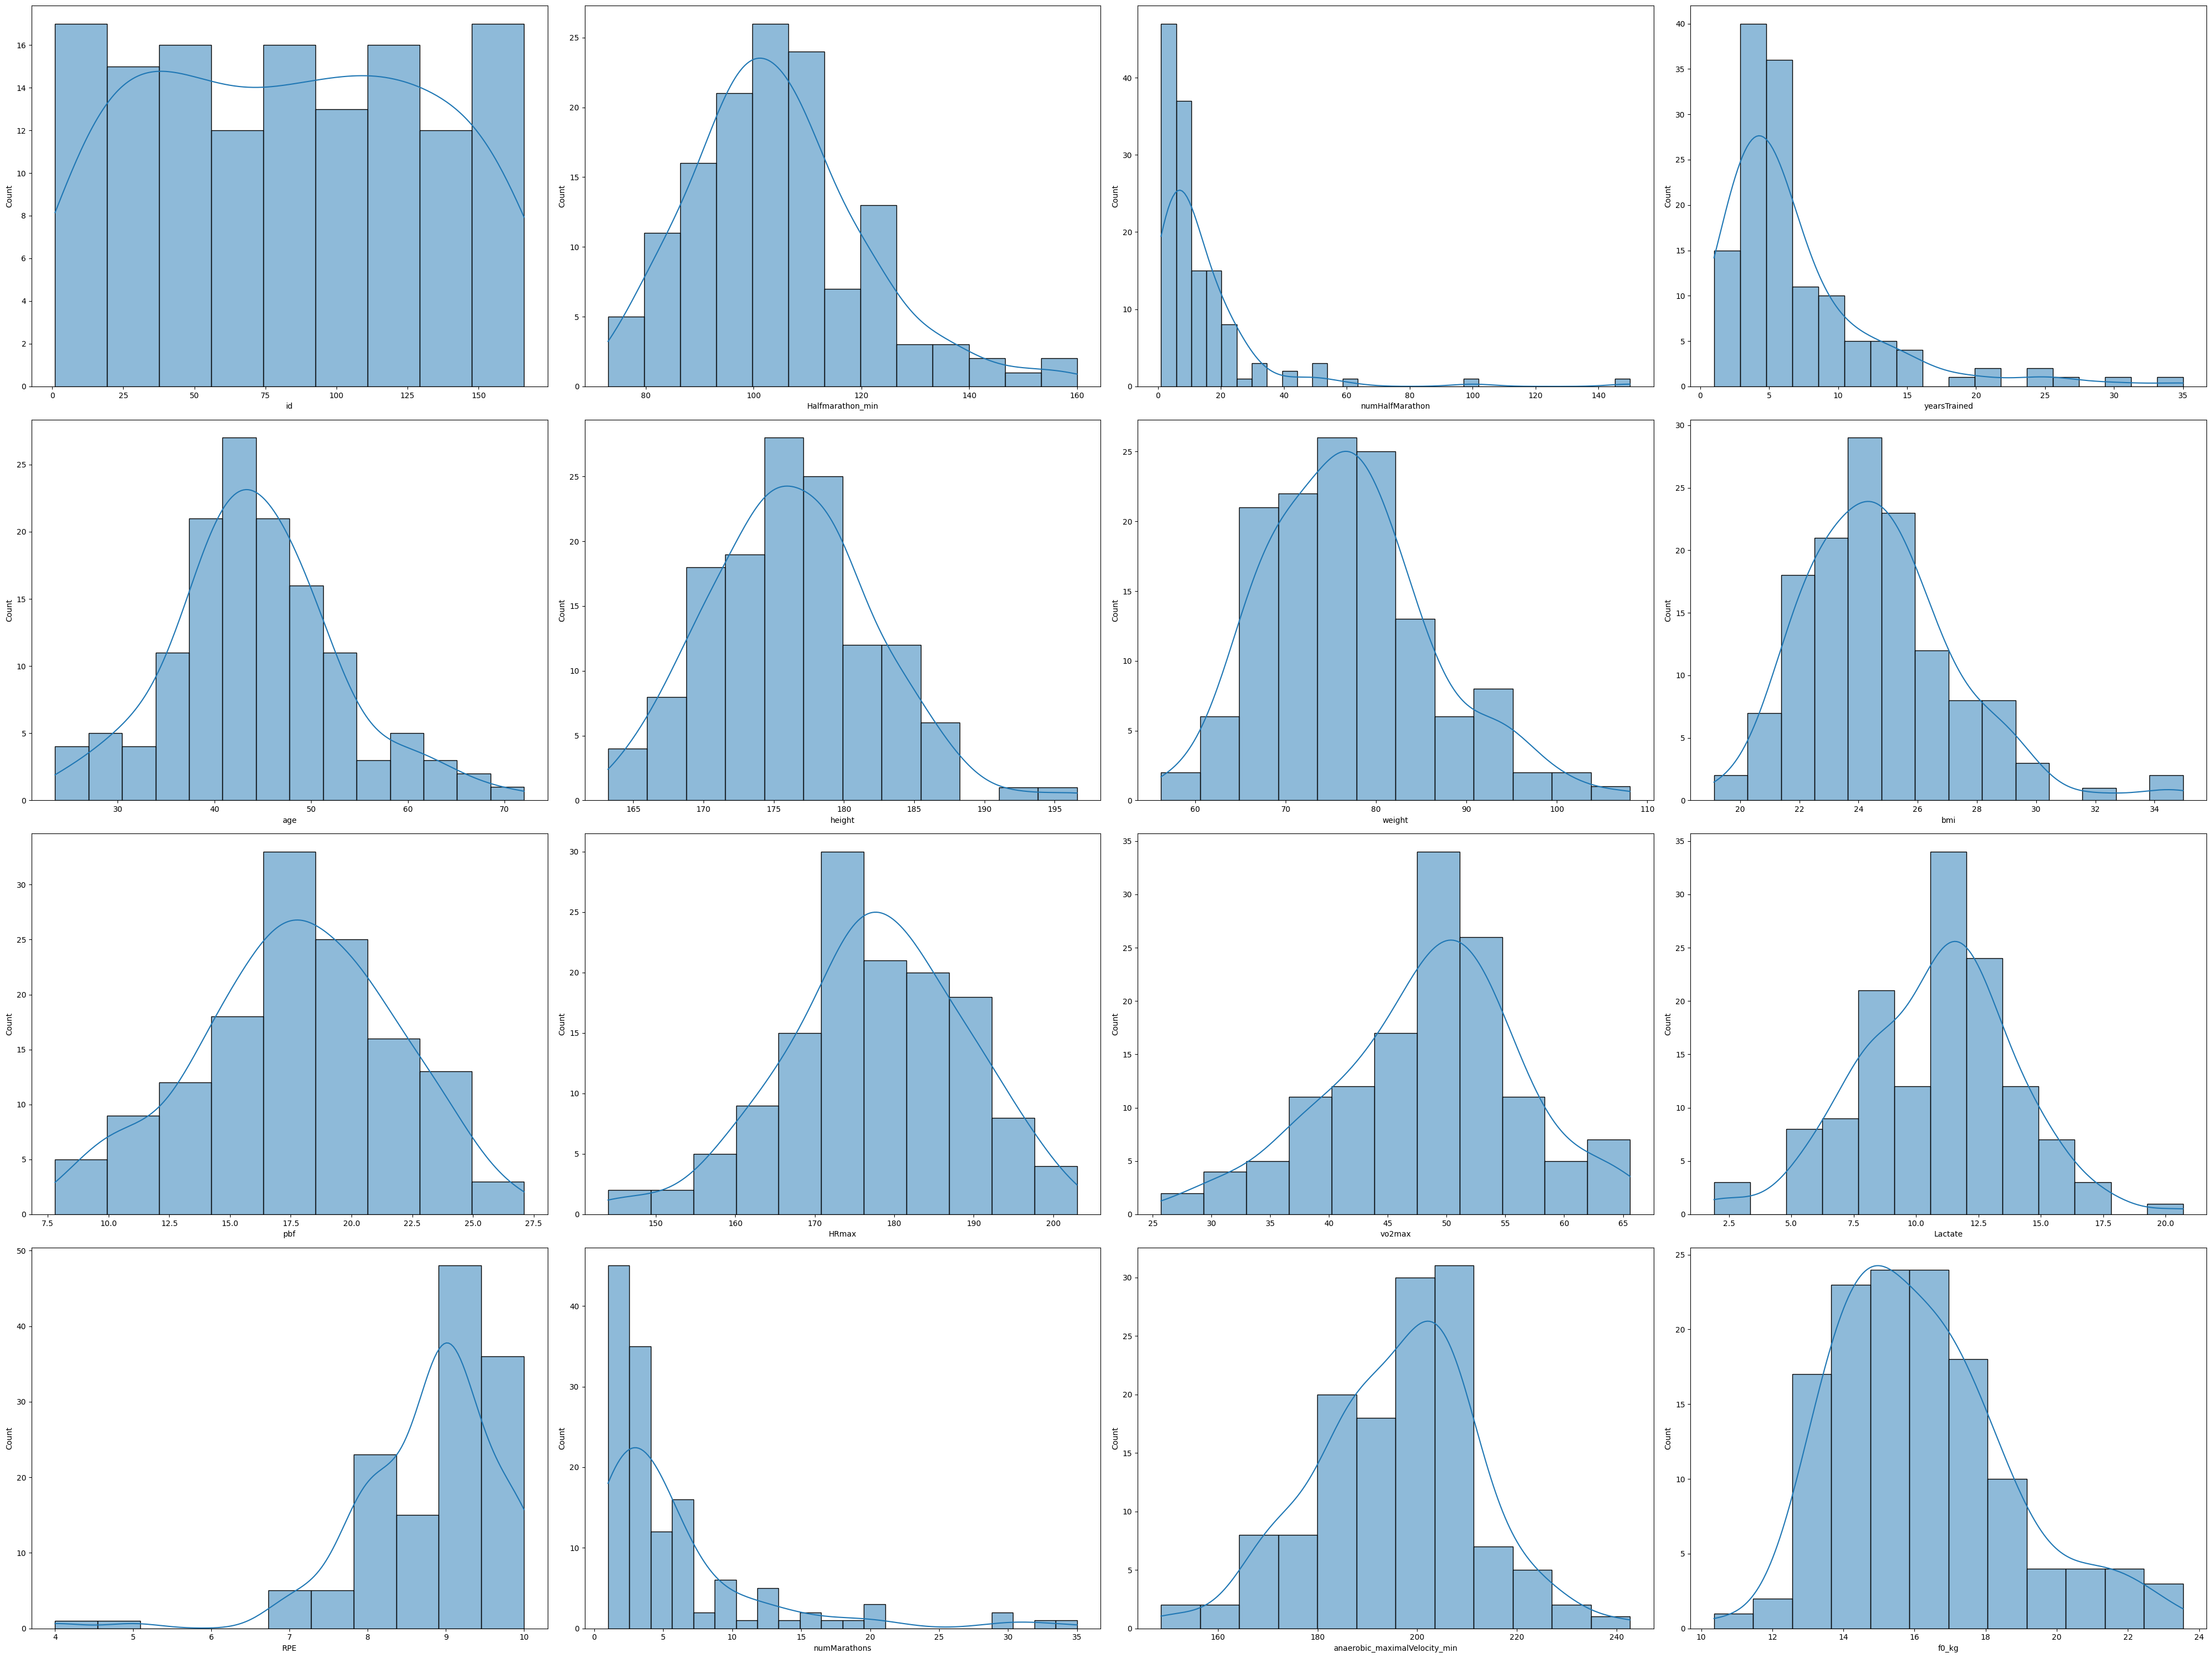

In [7]:
n_rows=4
n_cols=4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(40, 30)
for i, column in enumerate(data.iloc[:,:16].columns):
    sns.histplot(data[column], ax=axes[i//n_cols, i % n_cols], kde=True)
plt.tight_layout()


#### __*SCATTER PLOTS FOR MARATHON TIME*__

All of the following plots are useful to show what are the variables that could have an interaction with marathon time, but we have to remember that marathon time is a predictor not a realization which means that we then would need to investigate the relationships with the single realizations. This is useful to understand what metrics we can suggest to the runner!!!

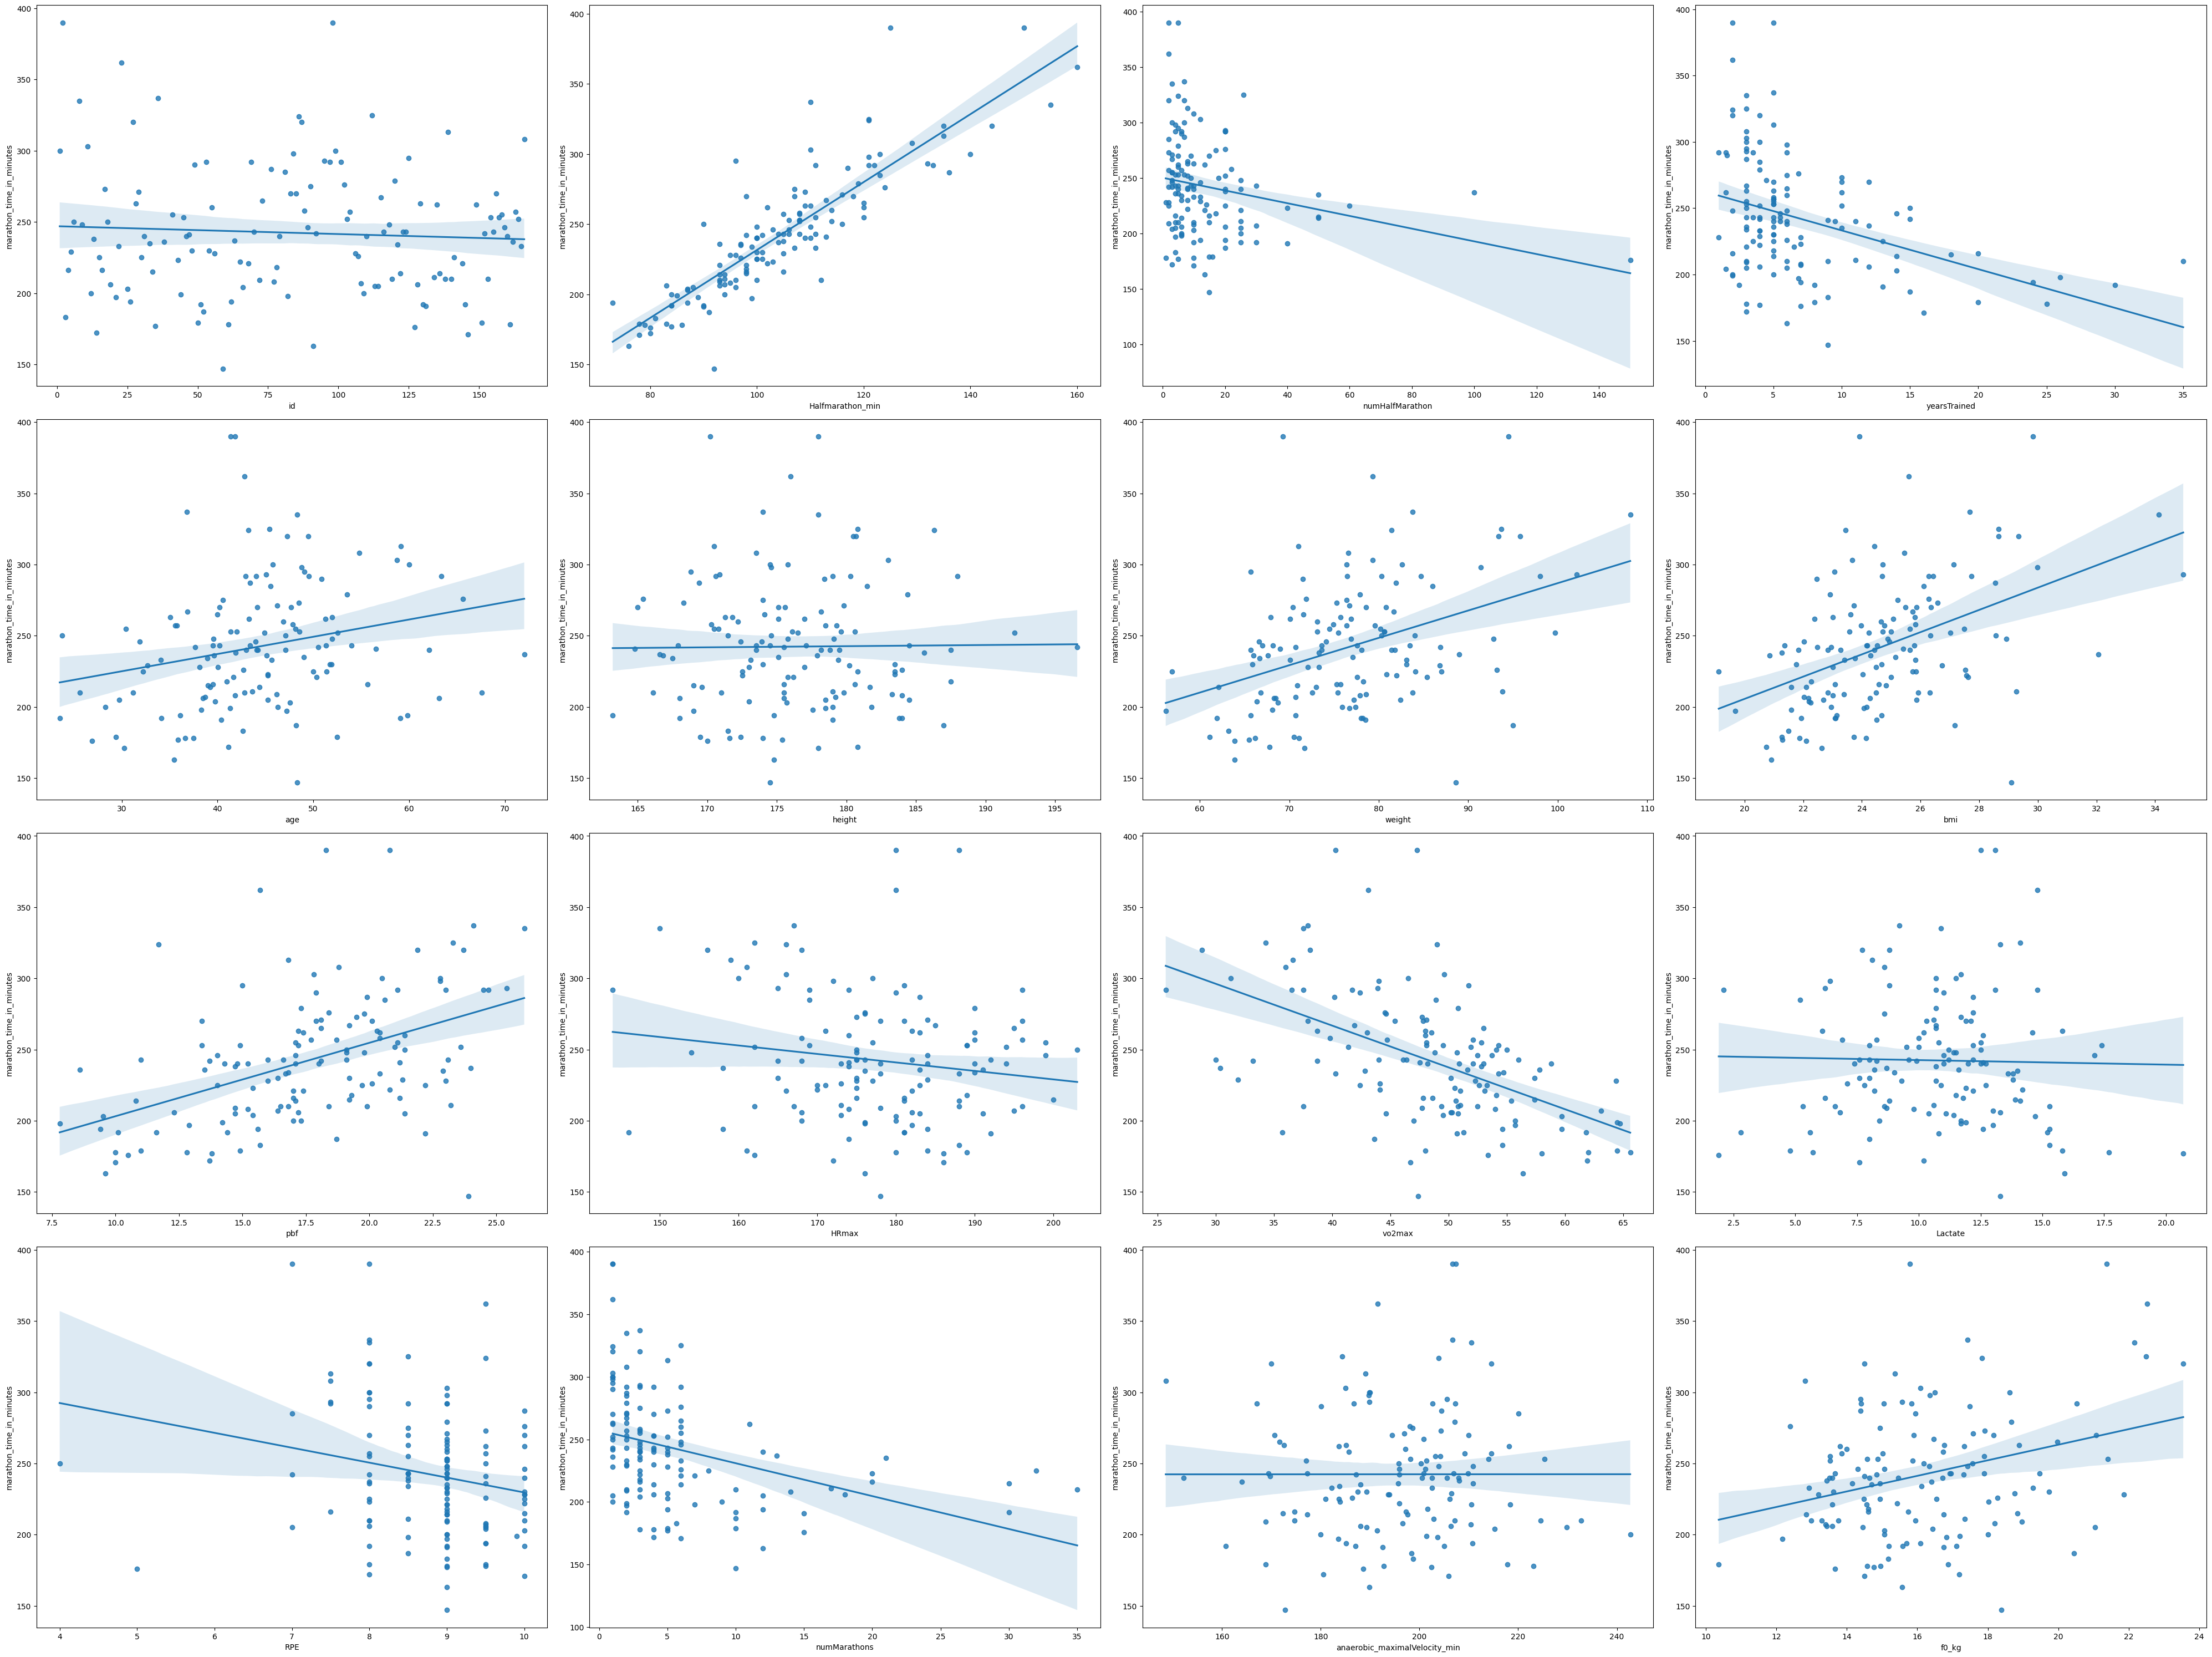

In [8]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(40, 30)
for i, column in enumerate(data.iloc[:,:16].columns):
    sns.regplot(x = data[column], y = data['marathon_time_in_minutes'],ax=axes[i//n_cols,i%n_cols])
plt.tight_layout()

__CONSIDERATIONS__

- Looking at the scatters, the variables that seem to have the best relationship are in order:

    - *pbf*
    - *vo2max*
    - *bmi*
    - *weight*
    - *Halfmarathon_min*  -> this is kinda to discuss because not everyone could have run a half marathon, but halfmarathon time is a great indicator!!

#### __*SCATTER PLOTS FOR HALF MARATHON TIME*__

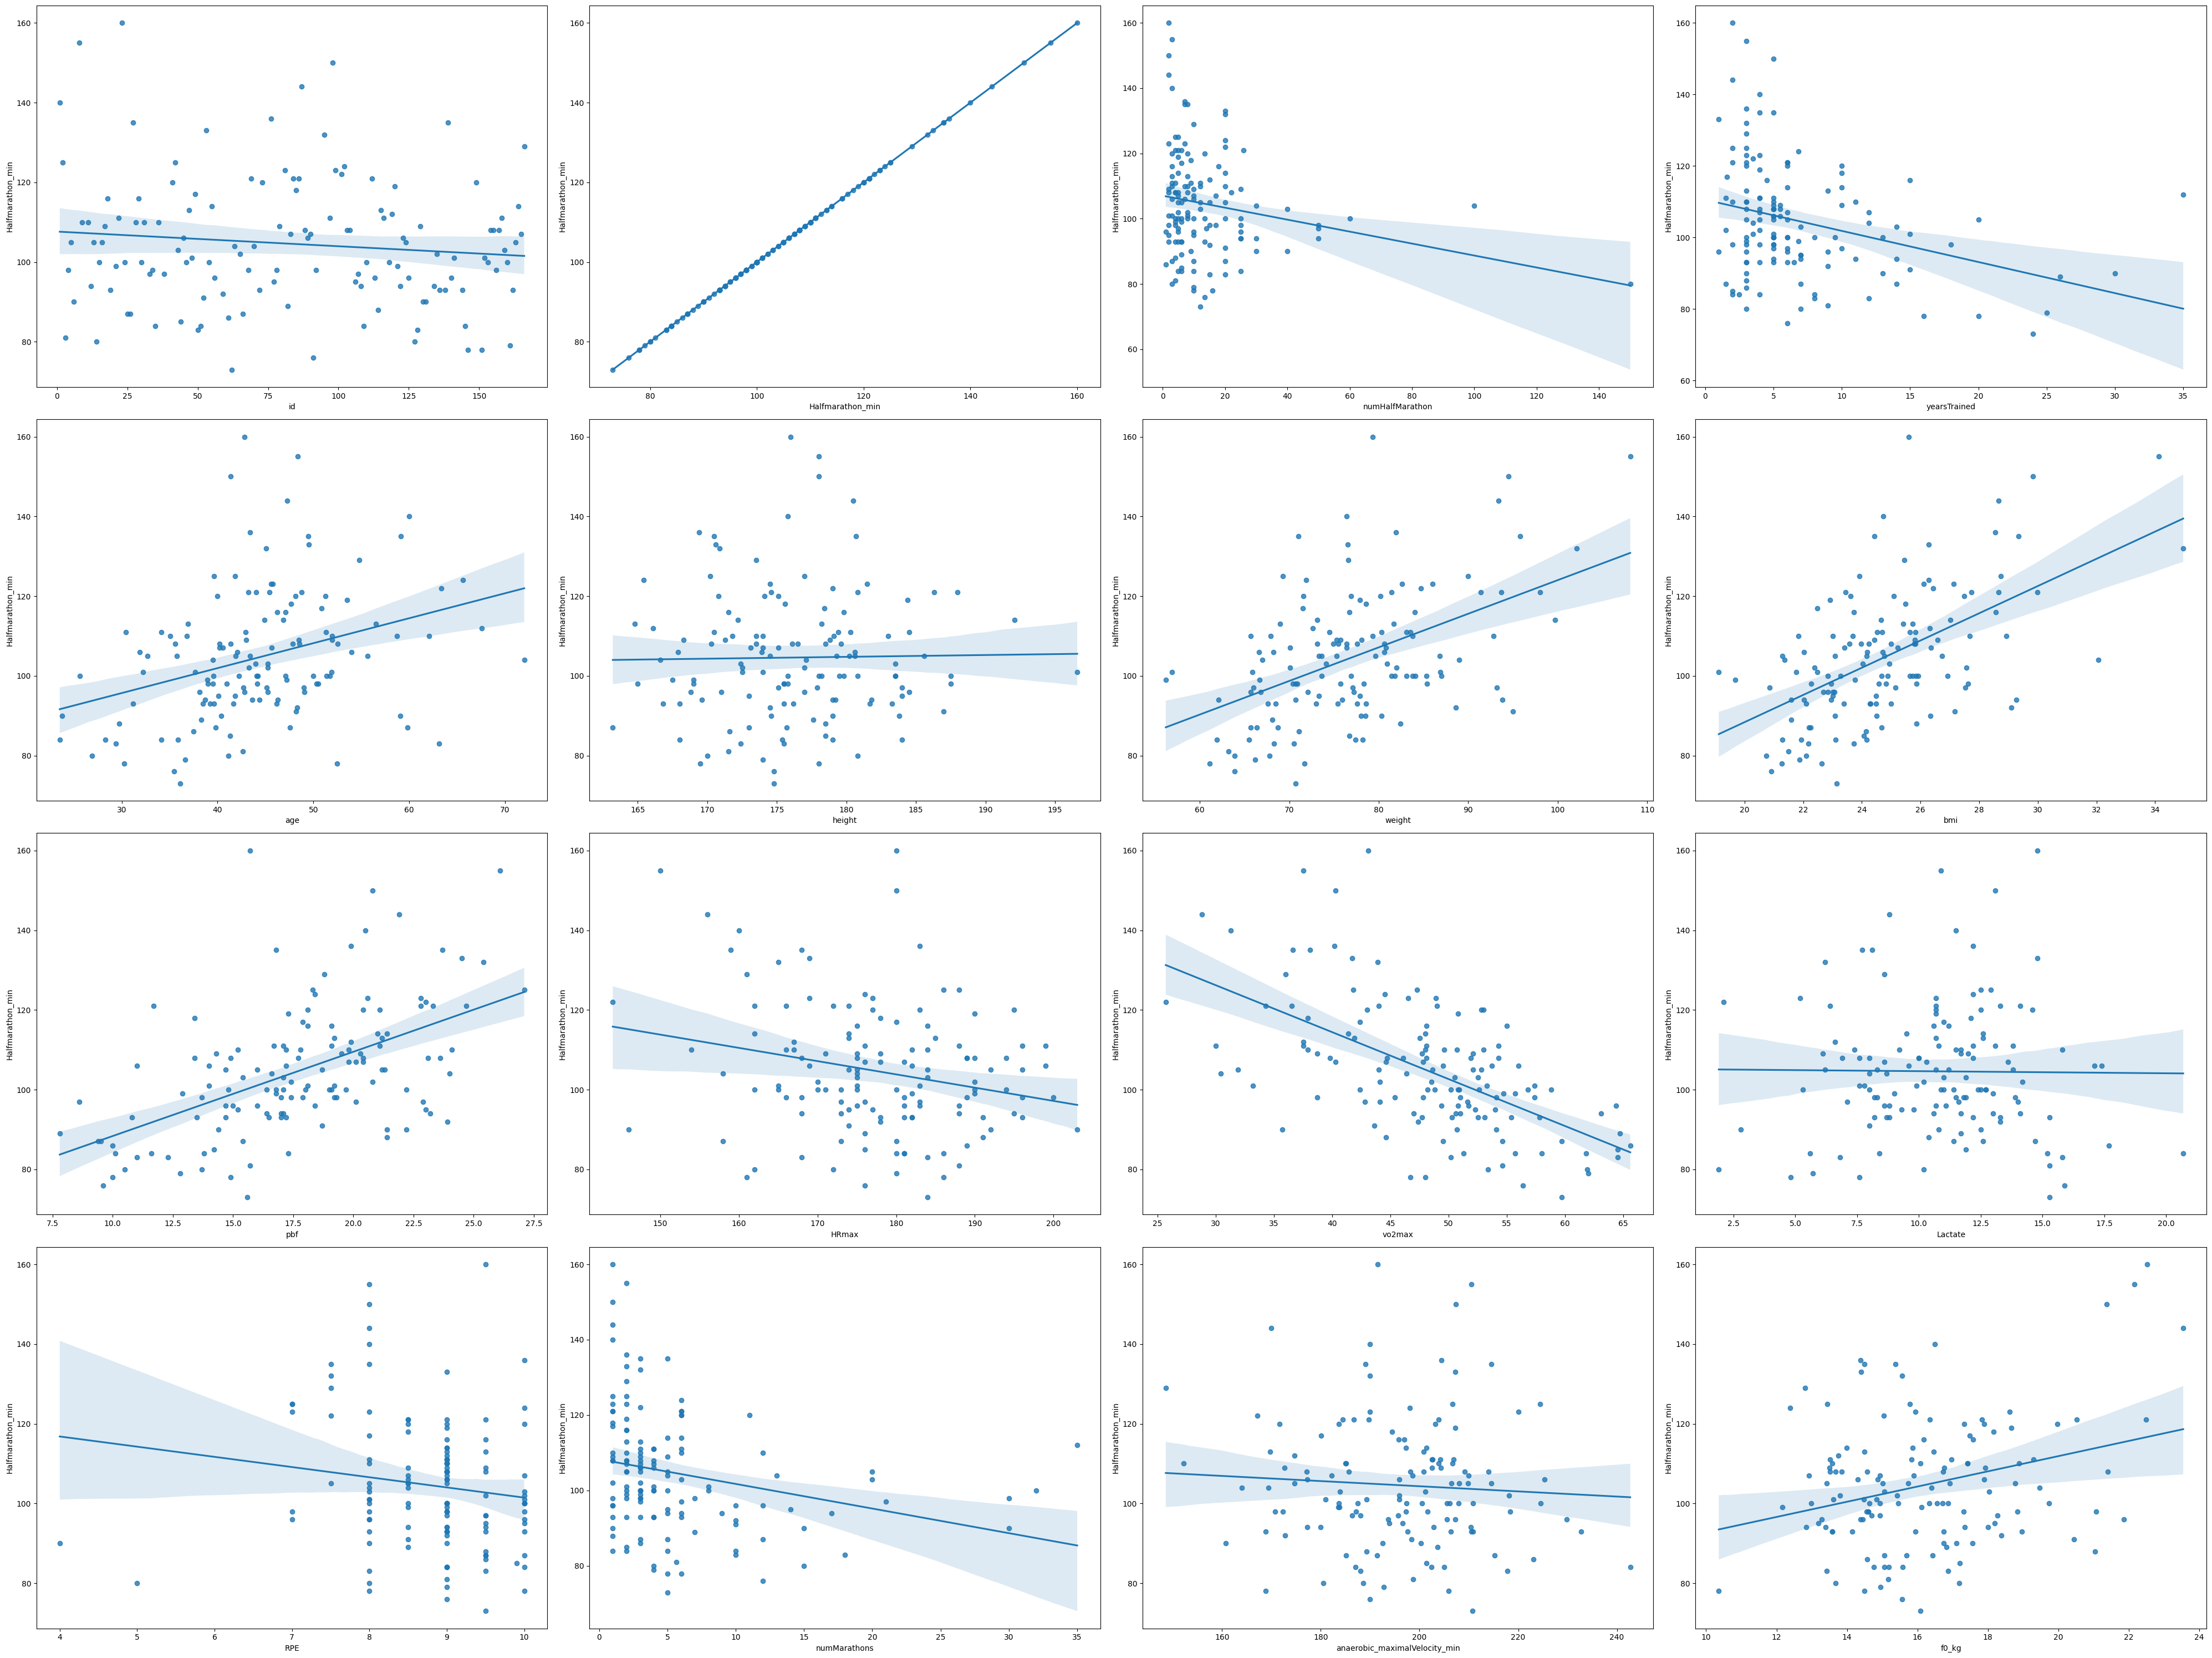

In [9]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(40, 30)
for i, column in enumerate(data.iloc[:,:16].columns):
    sns.regplot(x = data[column], y = data['Halfmarathon_min'],ax=axes[i//n_cols,i%n_cols])
plt.tight_layout()

- Looking at the scatters, the variables that seem to have the best relationship are in order:

    - *pbf*
    - *vo2max*
    - *bmi*
    - *weight*

#### __CONSIDERATIONS__

Most athletes ran less than 30 half marathons and trained for less than 10 years. All athletes are males but we already knew that and all athletes are adults ranging from about 25 to 70 years old. From this we can see that we can drop sex col and HlfM_predicted in the cleaning_Dataset ipynb and re run the histograms. Also groupsHalfMar can be dropped given that it is not relevant.

Most athletes range between 168-185cm height and weight between 62-90kg.

Most athletes max Heart rate ranges betweeen 170-190bpm.



### __*SECOND 16 FEATURE SET*__

#### __*HISTOGRAM OF DISTRUBUTION*__

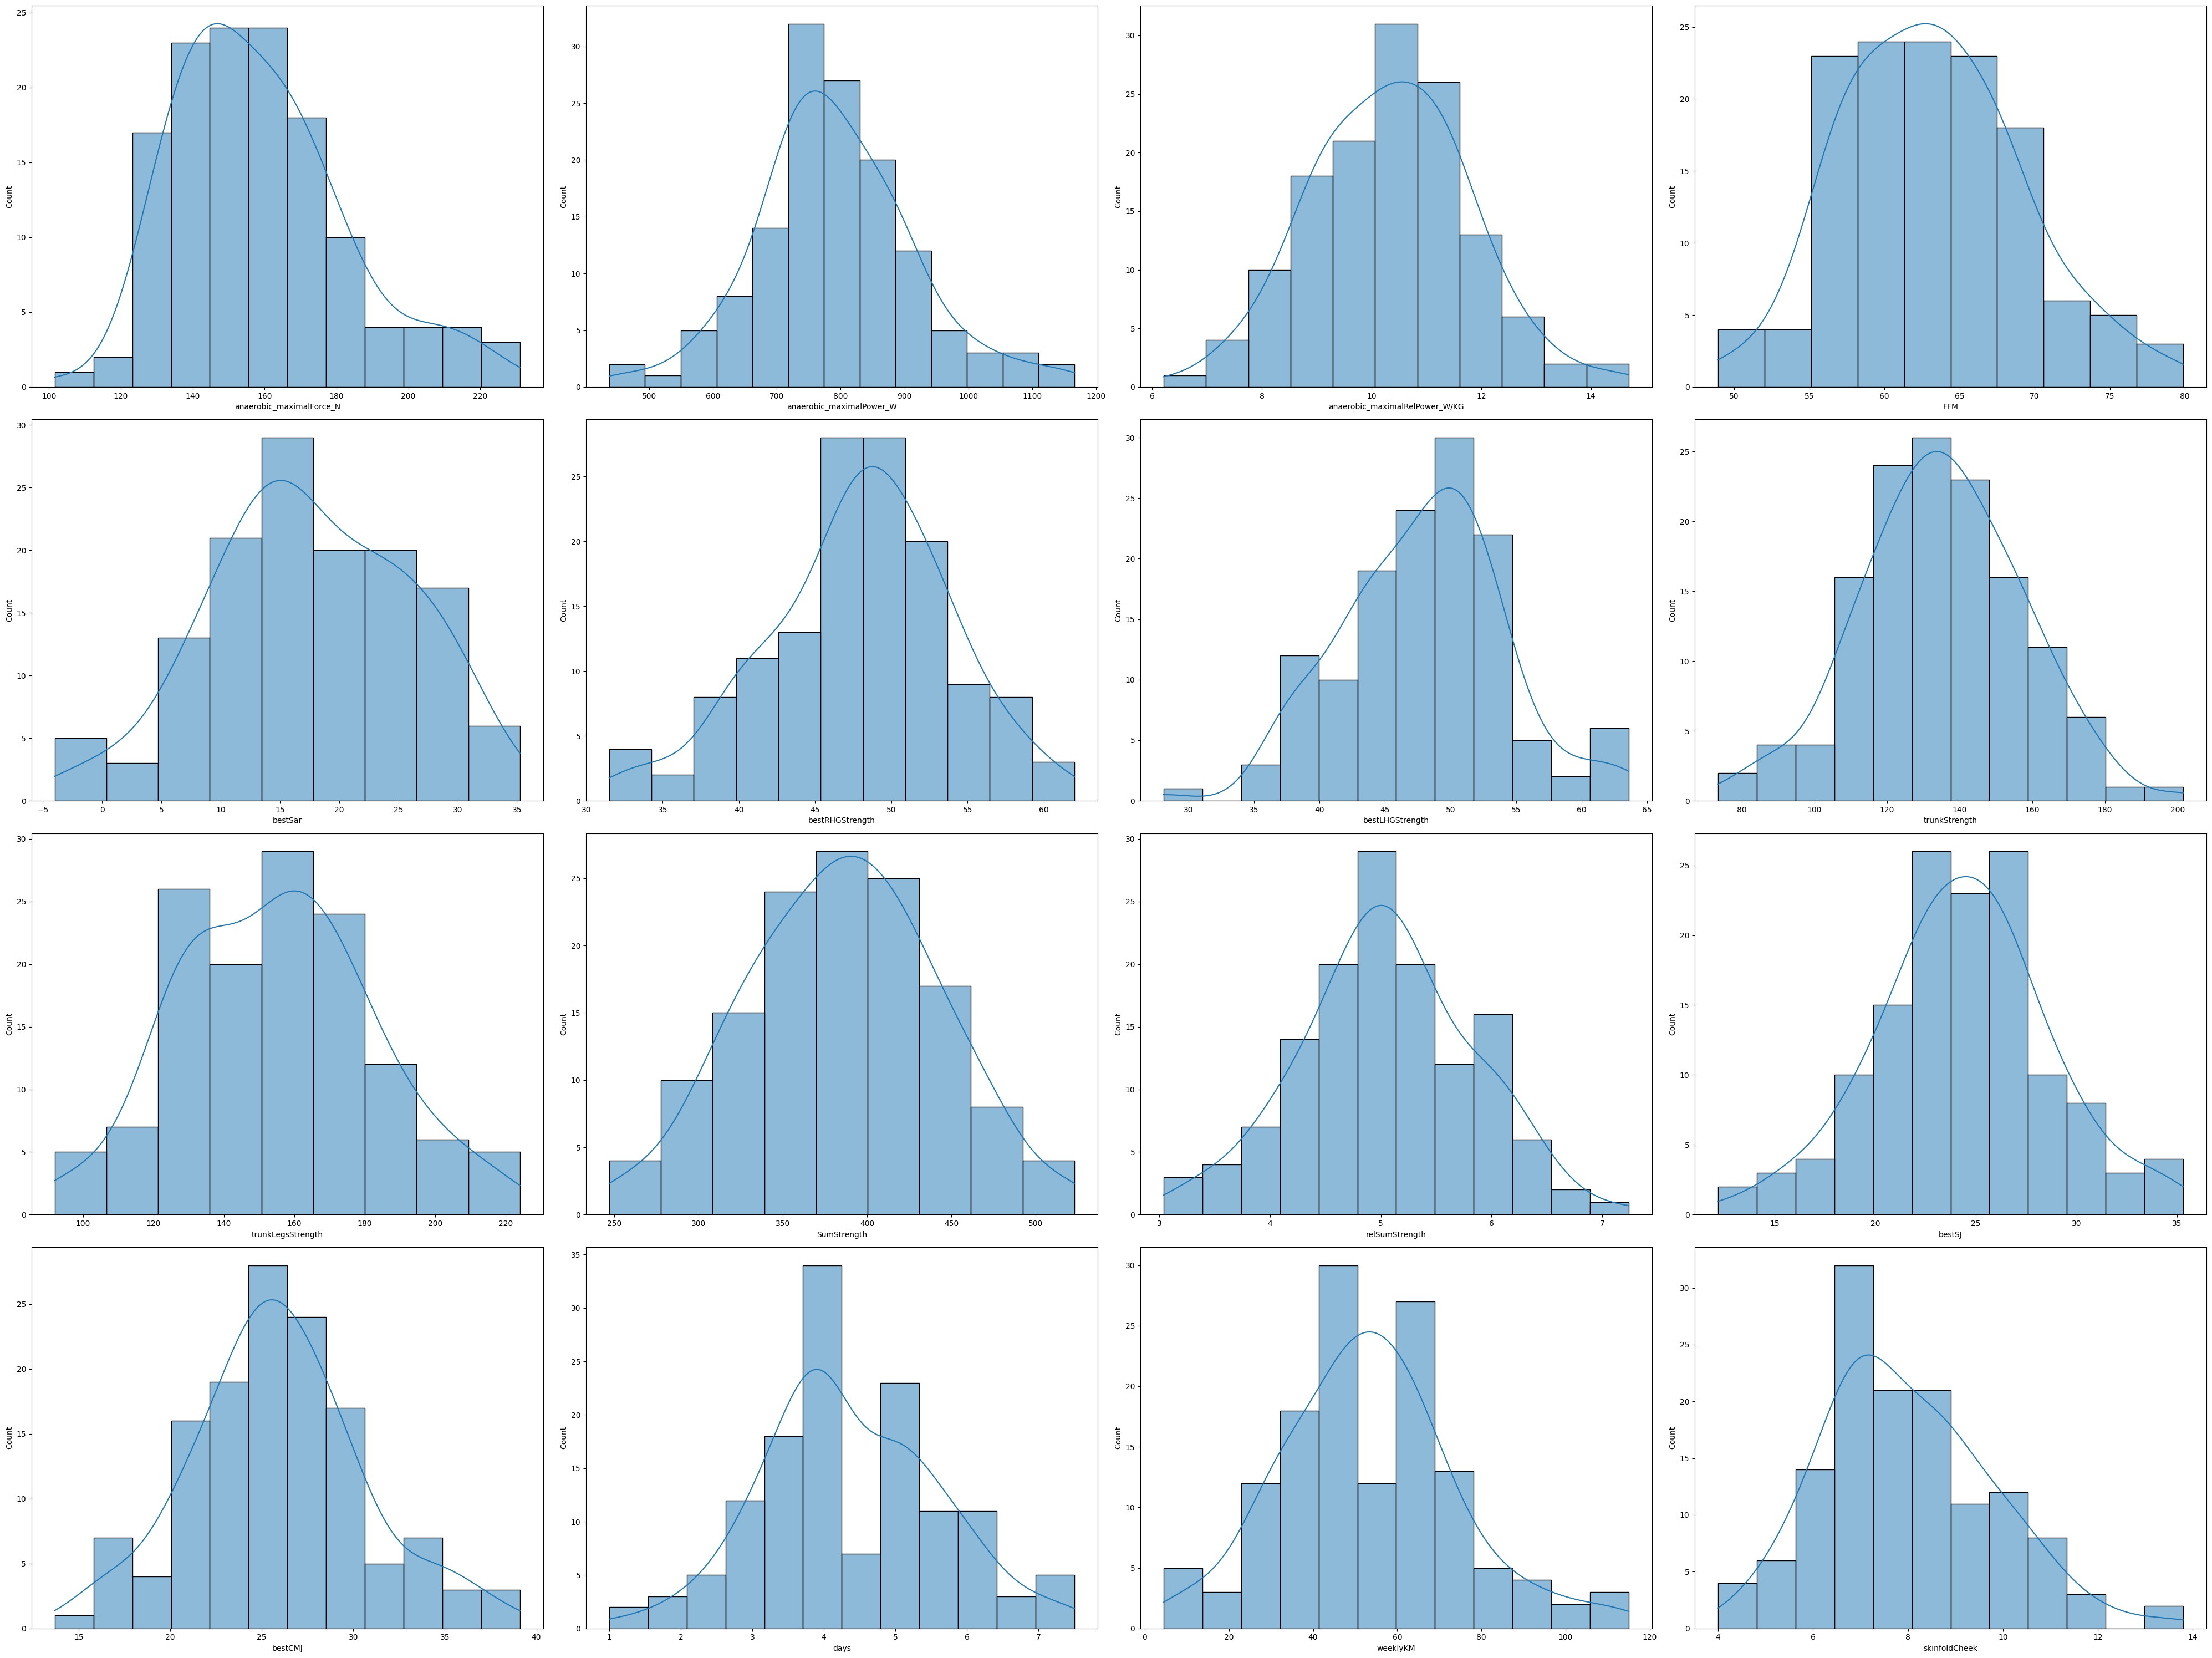

In [10]:
n_rows=4
n_cols=4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(40, 30)
for i, column in enumerate(data.iloc[:,16:32].columns):
    sns.histplot(data[column], ax=axes[i//n_cols, i % n_cols], kde=True)
plt.tight_layout()

#### __*SCATTER PLOTS FOR MARATHON TIME*__

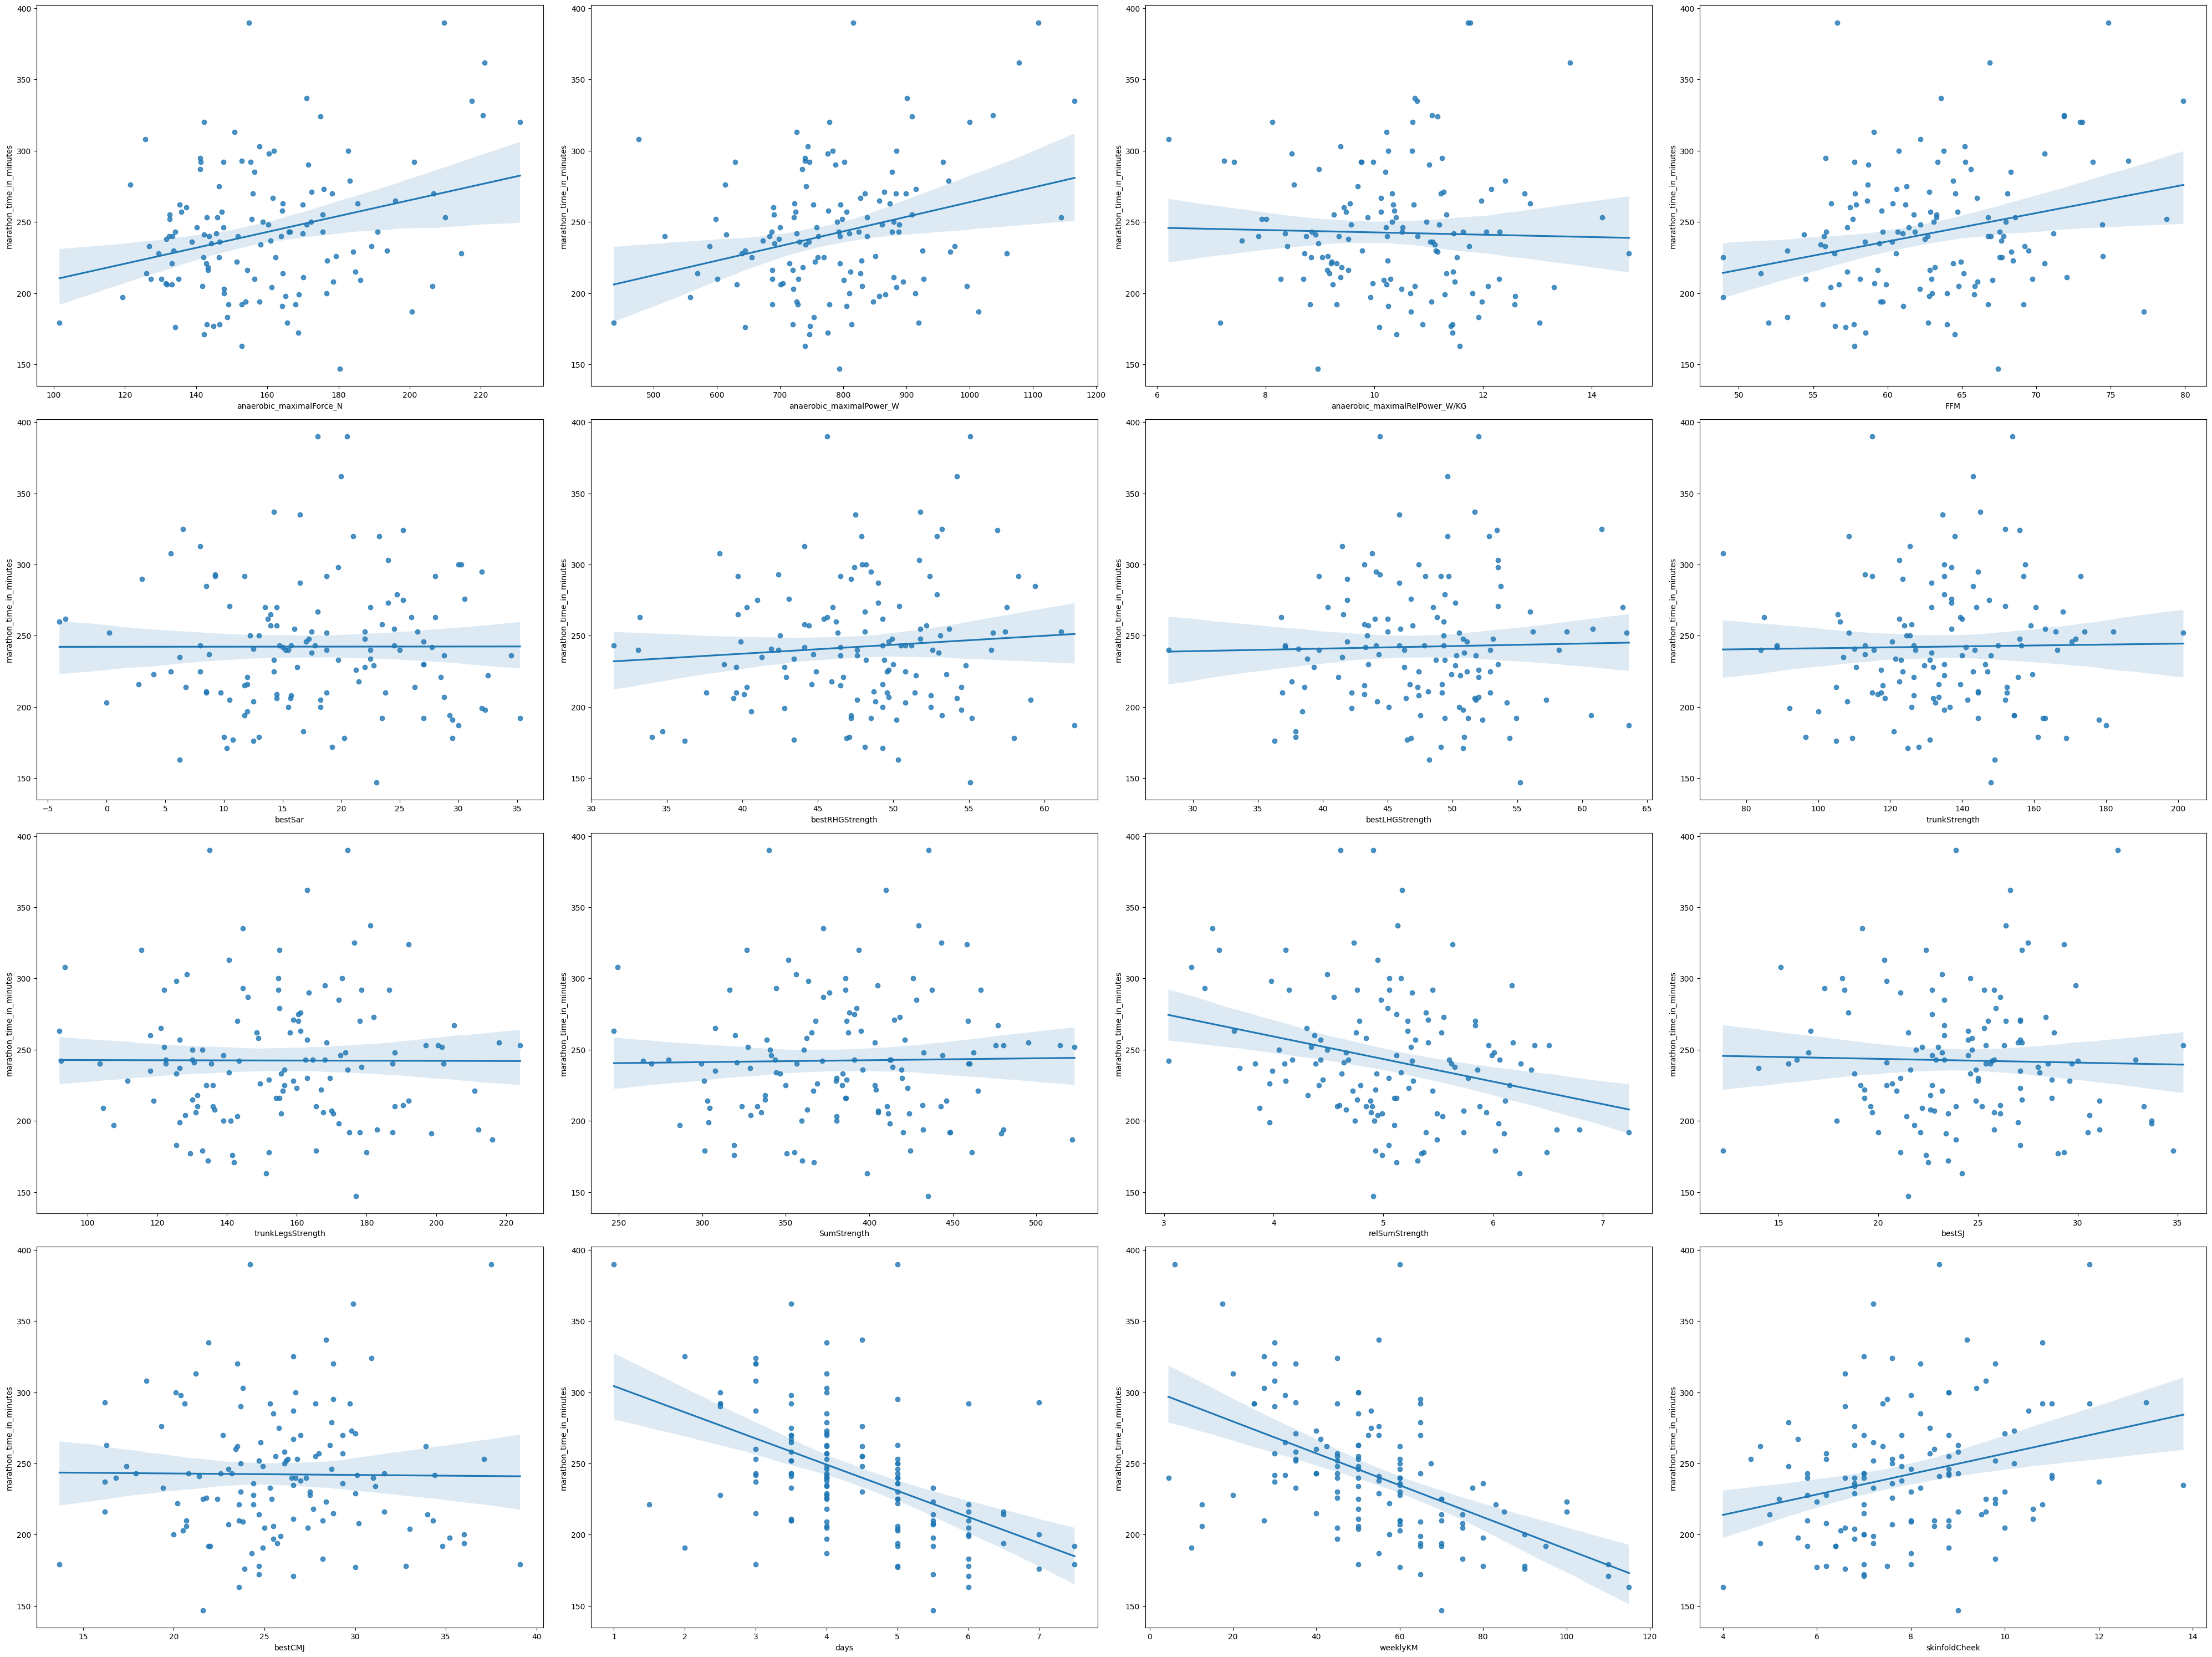

In [11]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(40, 30)
for i, column in enumerate(data.iloc[:,16:32].columns):
    sns.regplot(x = data[column], y = data['marathon_time_in_minutes'],ax=axes[i//n_cols,i%n_cols])
plt.tight_layout()

- Looking at the scatters, the variables that seem to have the best relationship are in order:

    - *FFM* -> kinda
    - *relSumStrength*
    - *weeklykm*
    - *days*

#### __*SCATTER PLOTS FOR HALF MARATHON TIME*__

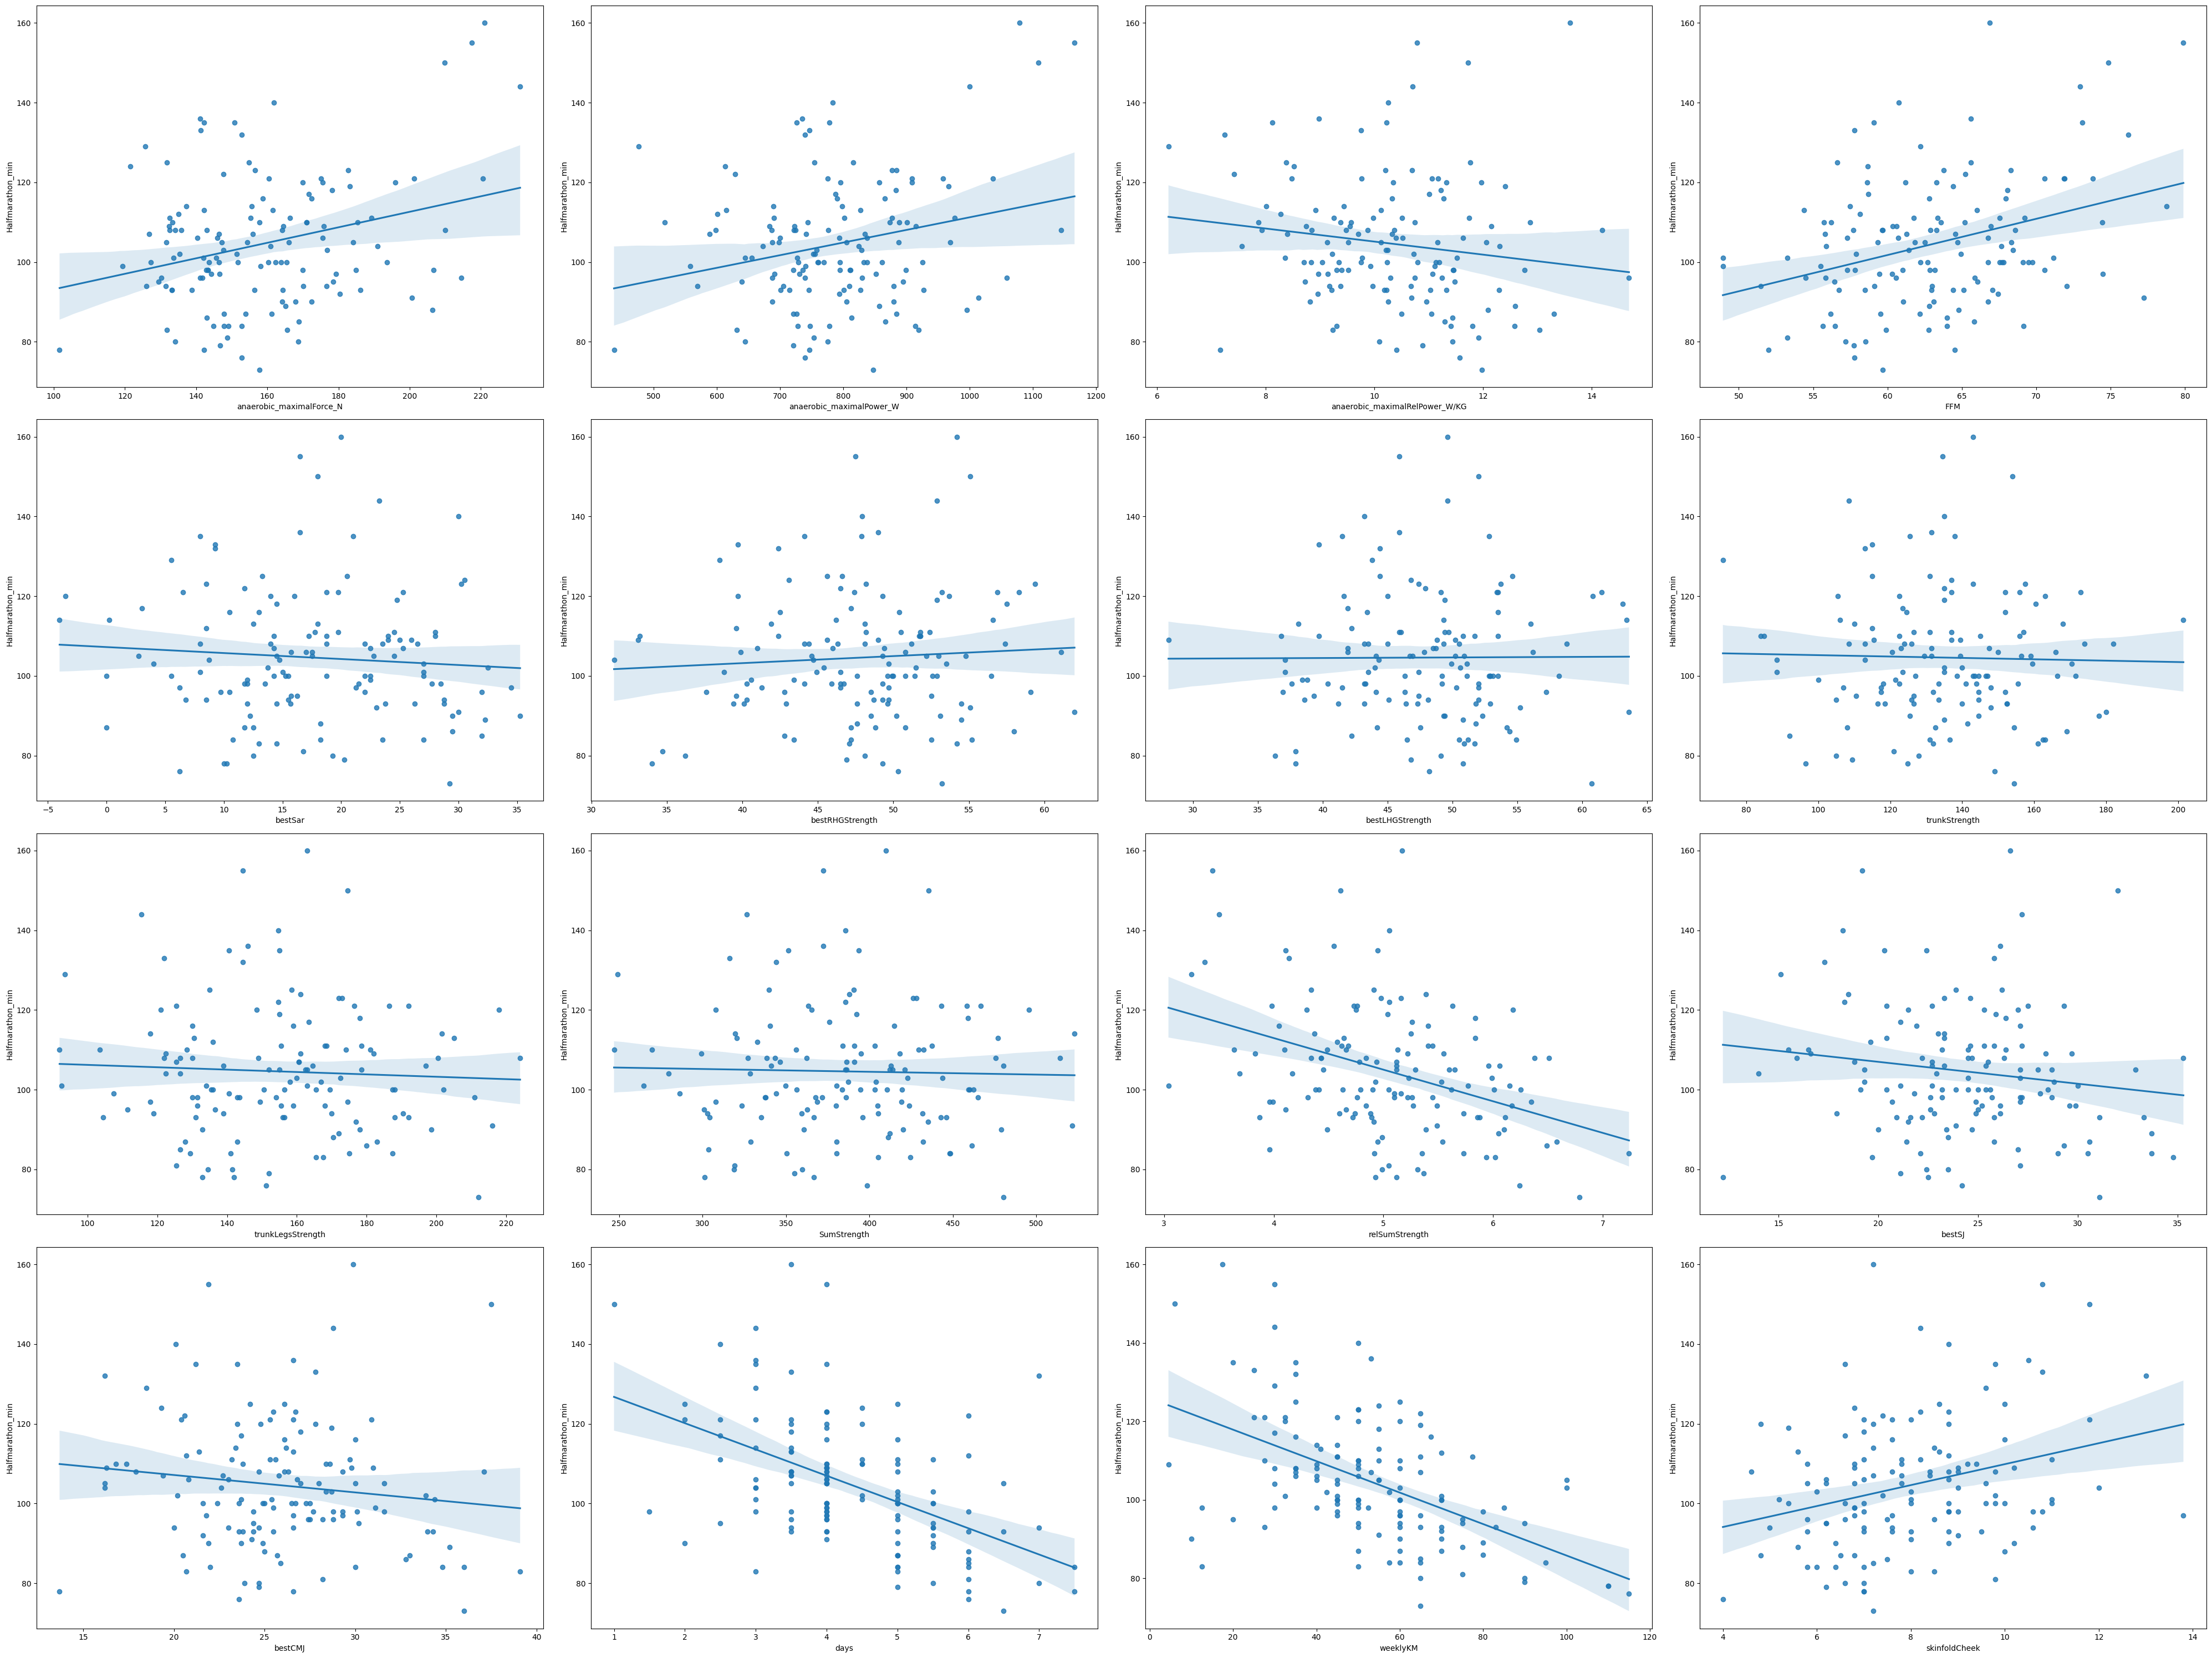

In [12]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(40, 30)
for i, column in enumerate(data.iloc[:,16:32].columns):
    sns.regplot(x = data[column], y = data['Halfmarathon_min'],ax=axes[i//n_cols,i%n_cols])
plt.tight_layout()

- Looking at the scatters, the variables that seem to have the best relationship are in order:

    - *FFM*
    - *relSumStrength*
    - *weeklykm*
    - *days*

#### __*CONSIDERAIONS*__


not many. SIT AND REACH tests exemplifies that in the second try people did worse, anyway from the best arises that most athlete do beween 10-30cm. Anaerobic forces tend to have same distributions they just have different mean of measures.

Very interesting to see that most people tend to train either 3-4-5 days and very few all days or just 1 or 2. Most athletes choose not go beyond 70km per week andin my opinion it is also due to the fact that many people haveother duties, daily jobs or families whichmakes it impossible to run more.

###  __*LAST 15 FEATURE SET*__

#### __*HISTOGRAM OF DISTRIBUTION*__

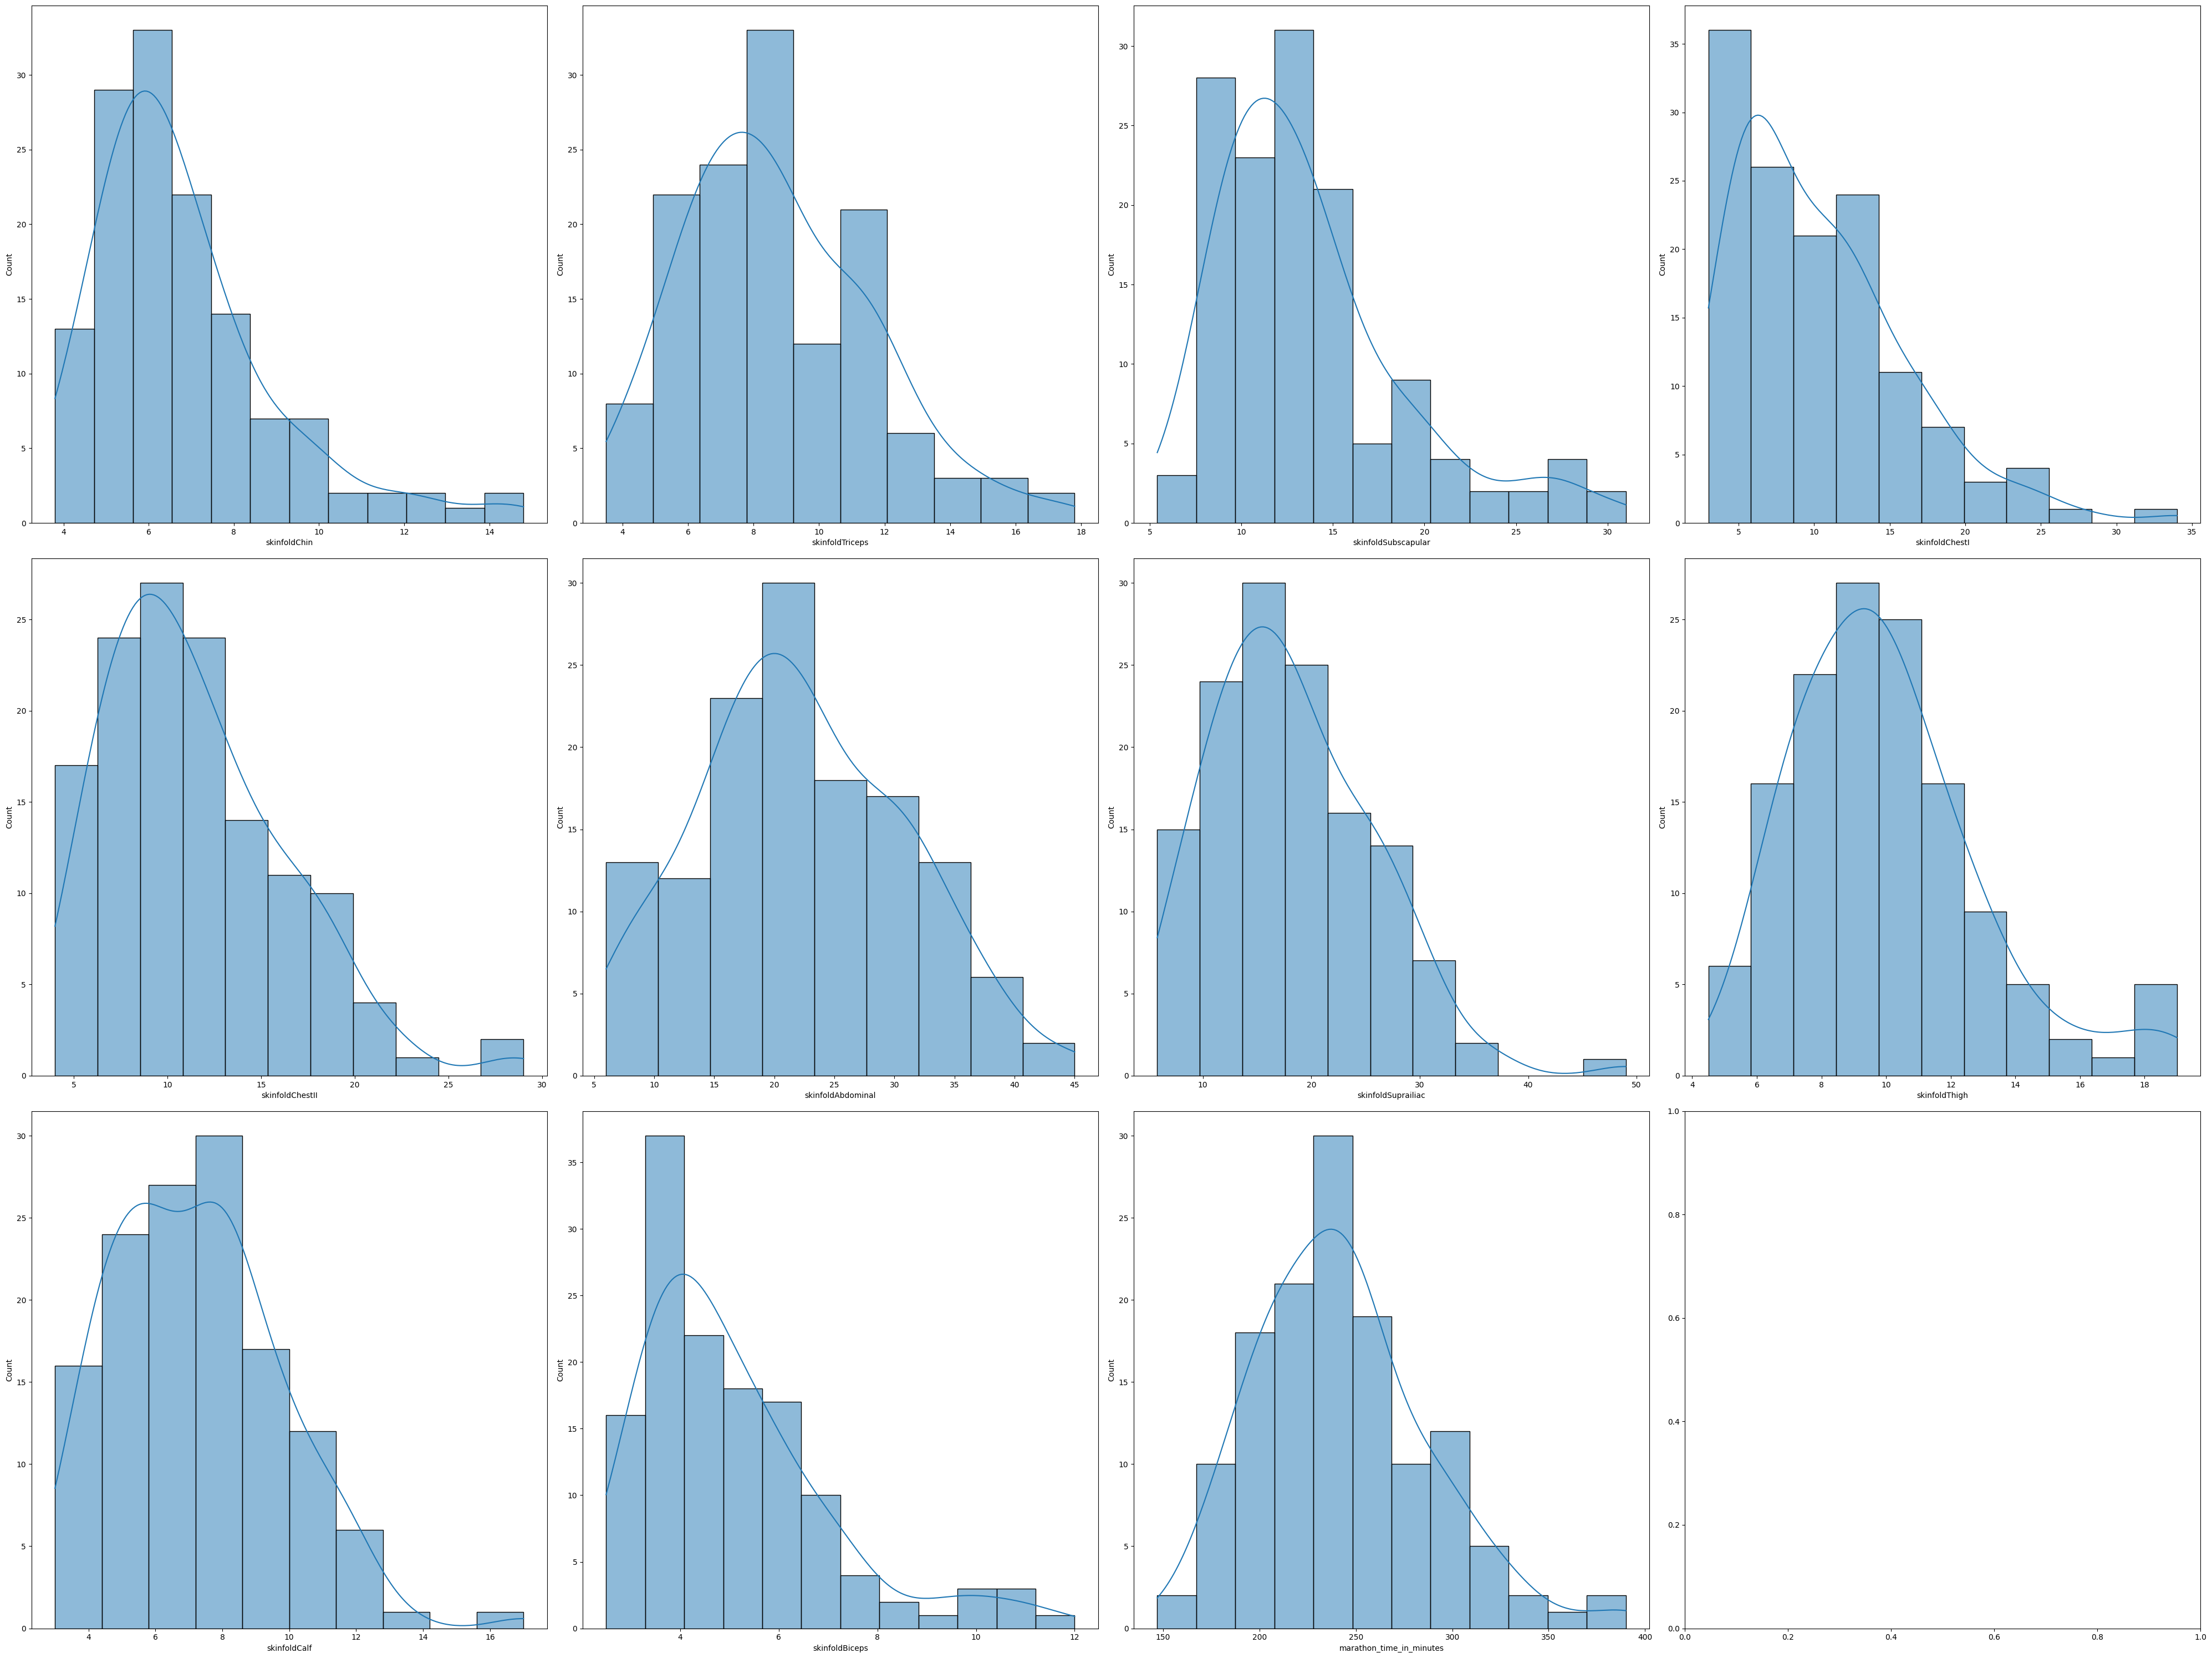

In [15]:
n_rows=3
n_cols=4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(40, 30)
for i, column in enumerate(data.iloc[:,32:44].columns):
    sns.histplot(data[column], ax=axes[i//n_cols, i % n_cols], kde=True)
plt.tight_layout()

#### __*SCATTER PLOTS FOR MARATHON TIME*__

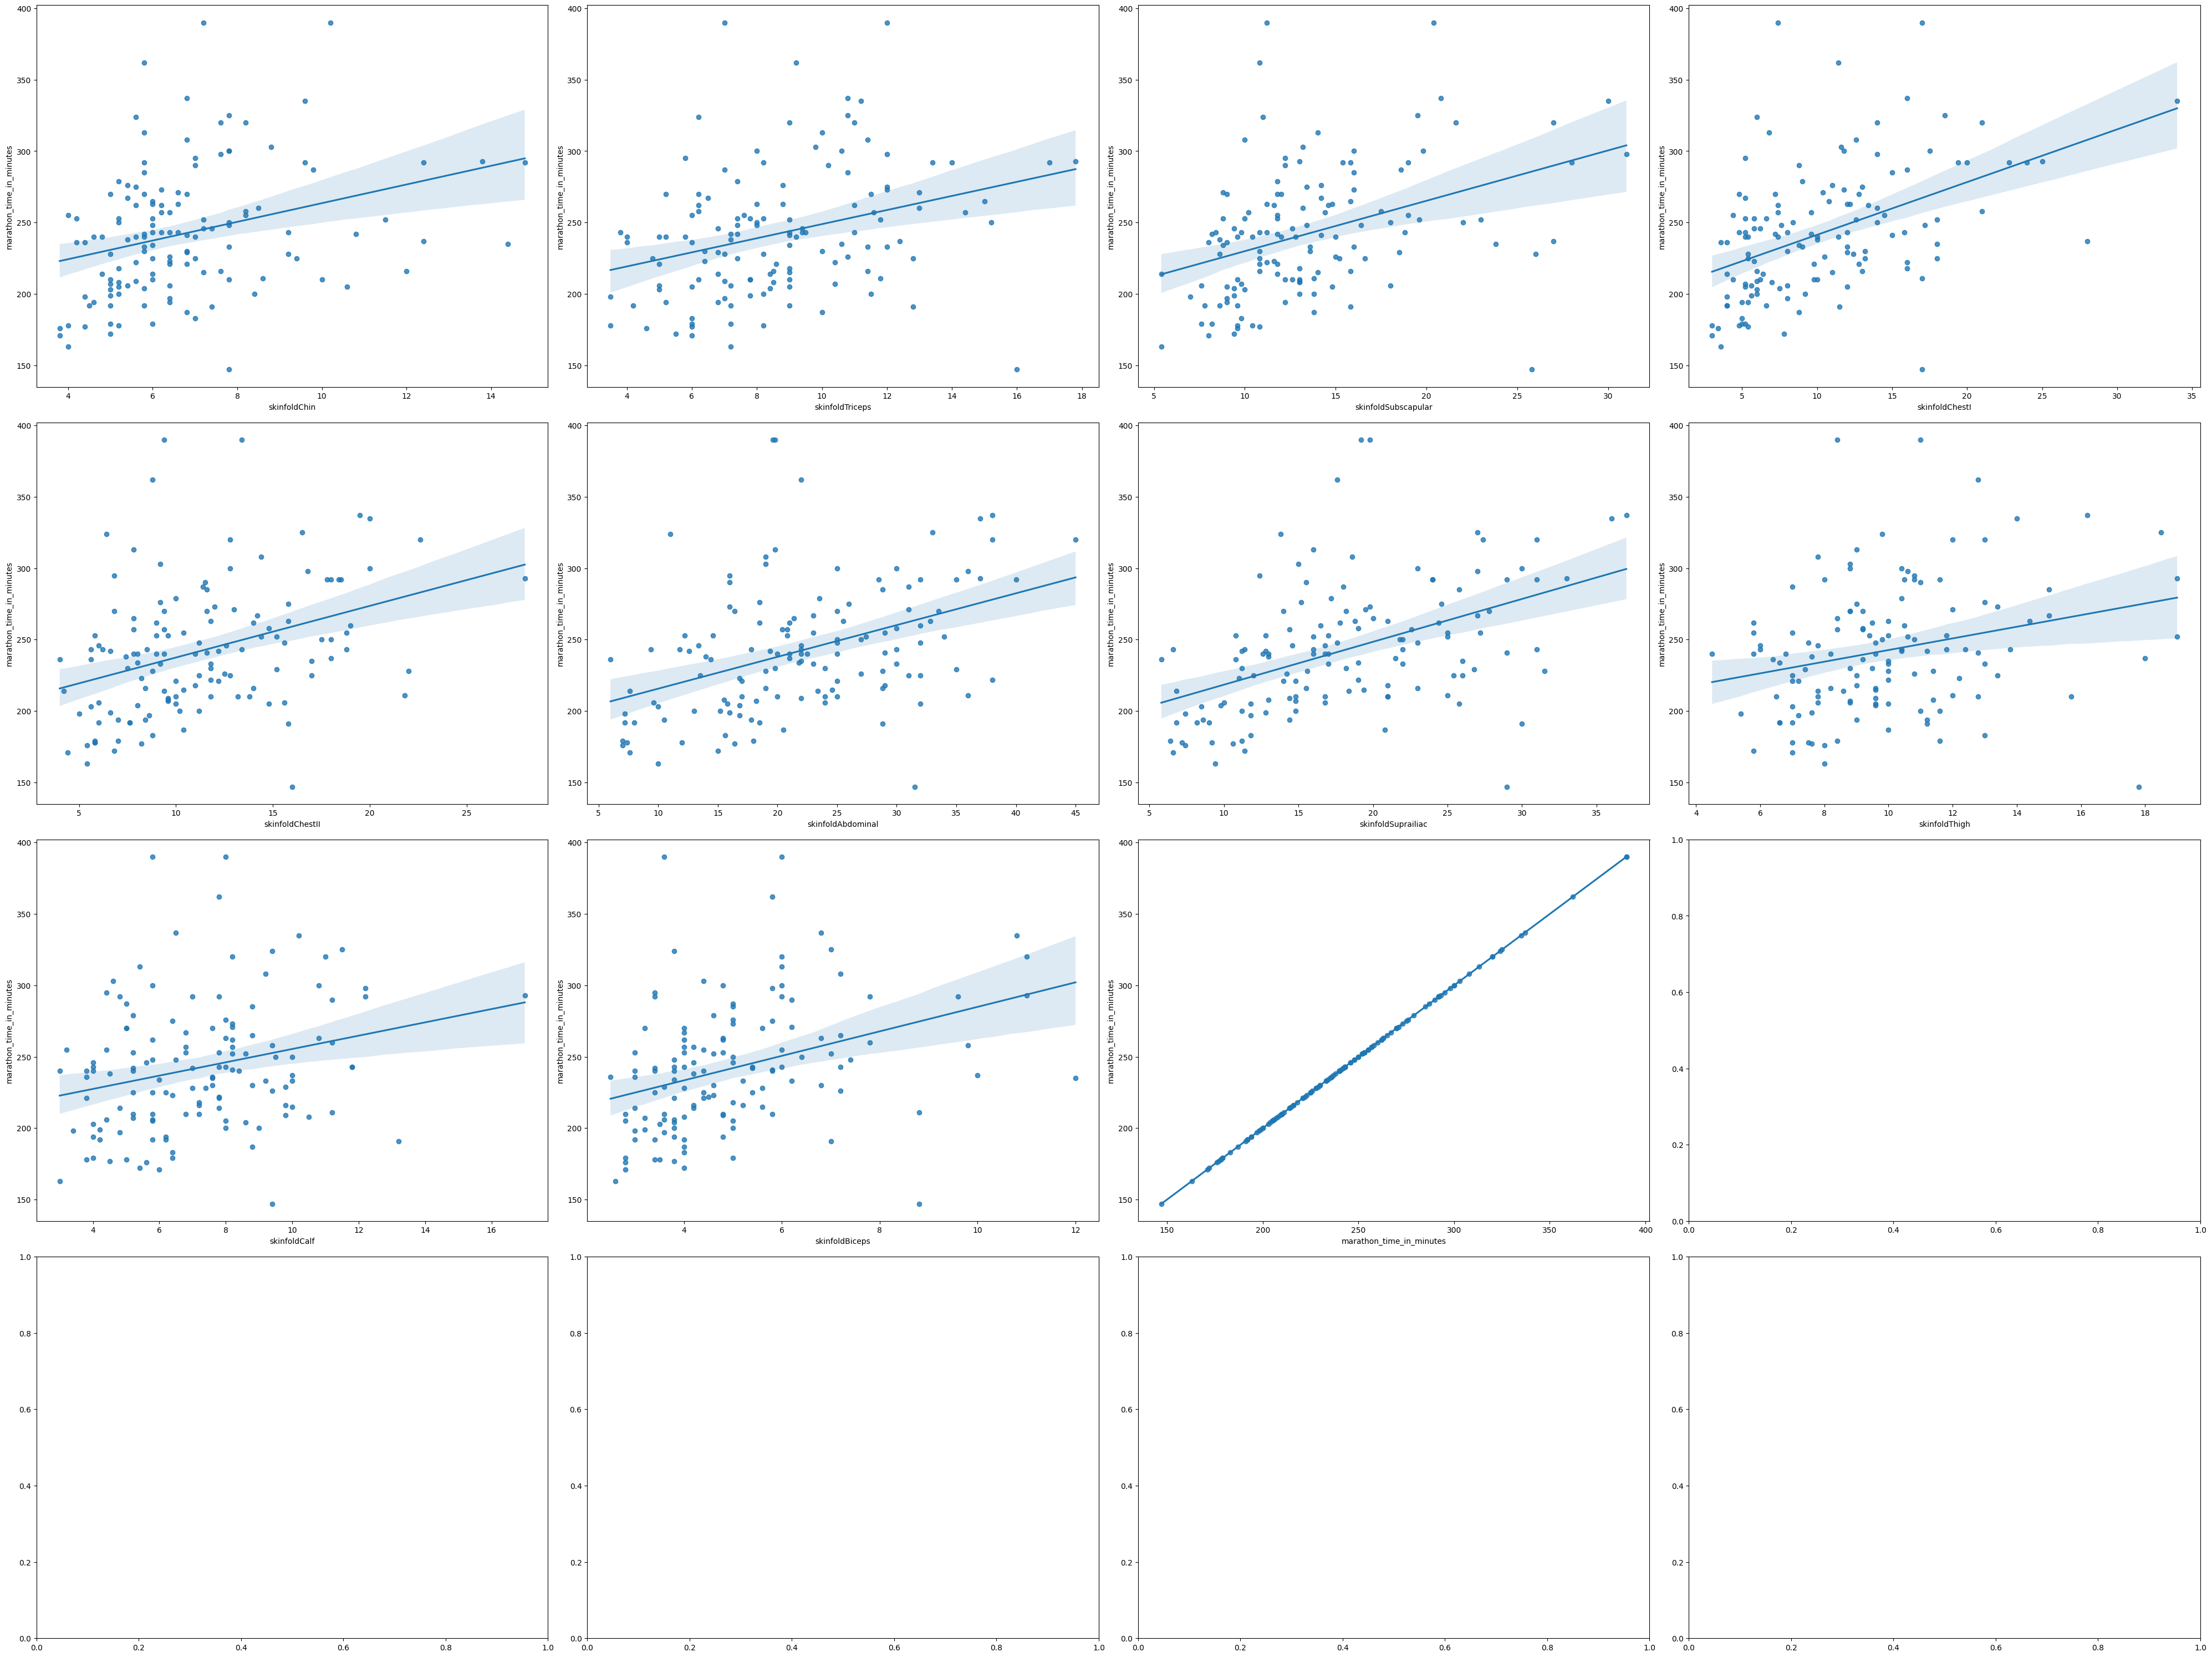

In [13]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(40, 30)
for i, column in enumerate(data.iloc[:,32:44].columns):
    sns.regplot(x = data[column], y = data['marathon_time_in_minutes'],ax=axes[i//n_cols,i%n_cols])
plt.tight_layout()

- Looking at the scatters, the variables that seem to have the best relationship are in order:

    - *SKinfoldAbdominal*
    - *SkinfoldSuprailic*

#### __*SCATTER PLOTS FOR HALF MARATHON TIME*__

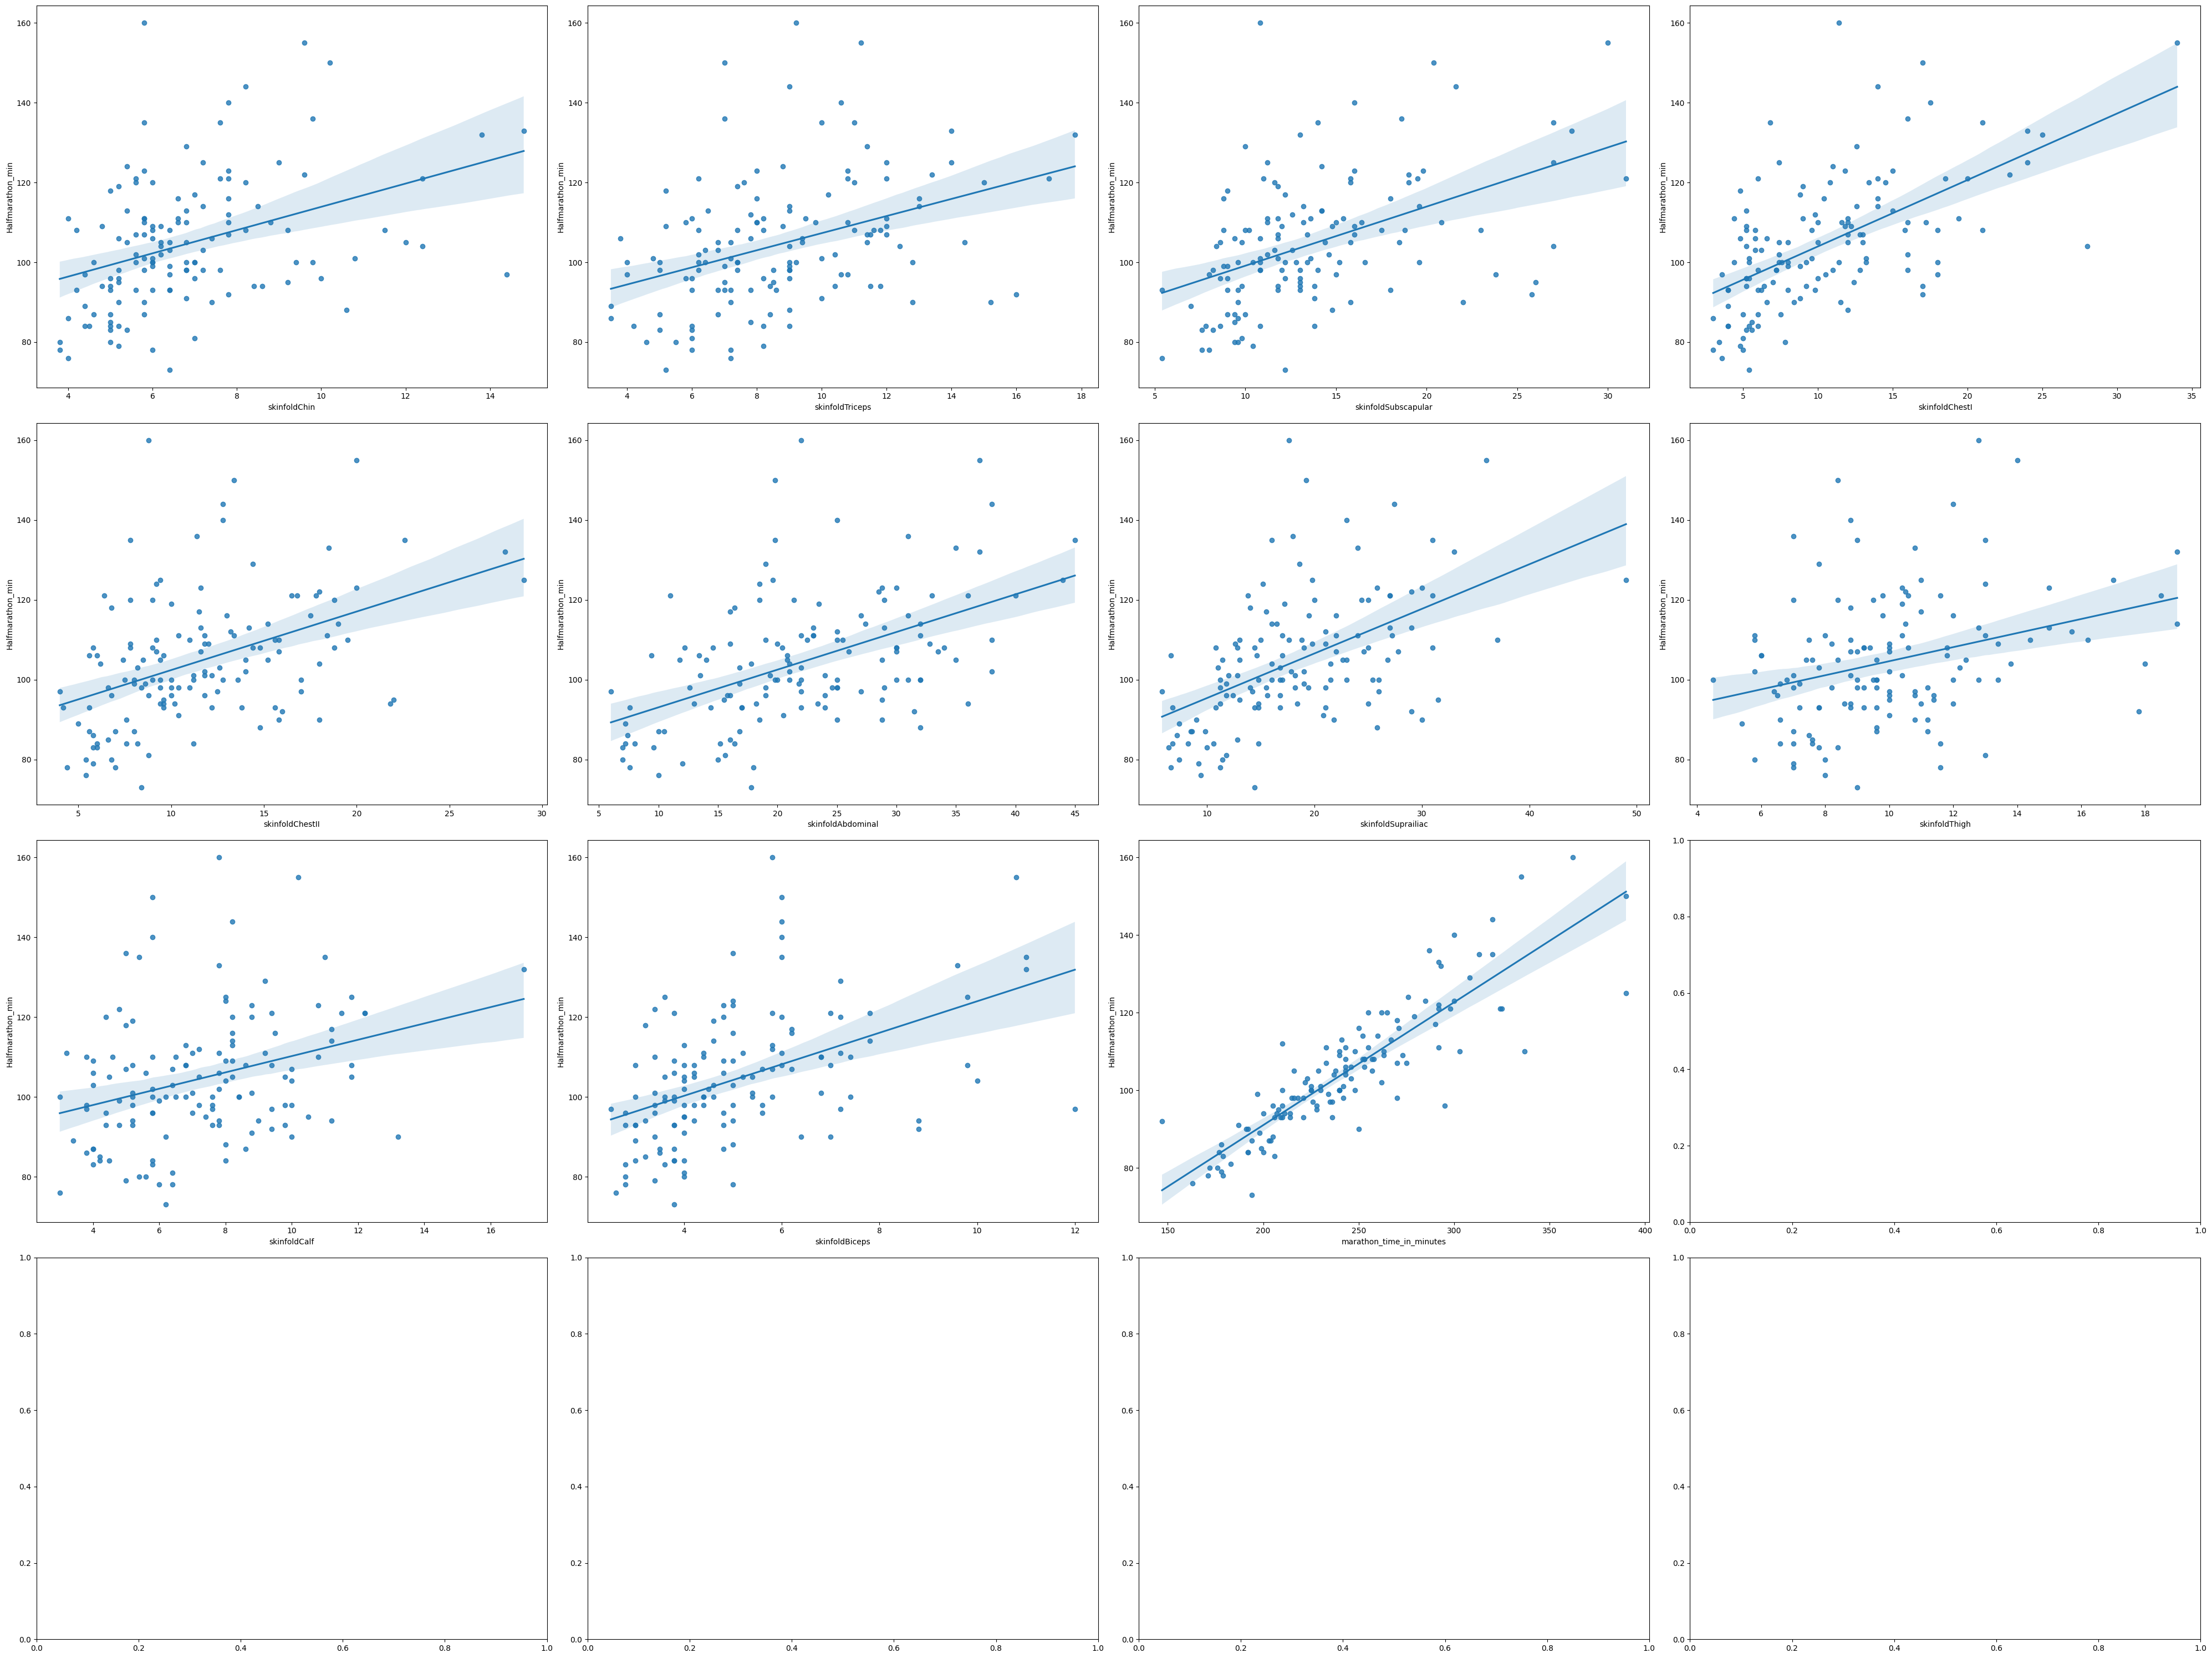

In [14]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(40, 30)
for i, column in enumerate(data.iloc[:,32:44].columns):
    sns.regplot(x = data[column], y = data['Halfmarathon_min'],ax=axes[i//n_cols,i%n_cols])
plt.tight_layout()

- Looking at the scatters, the variables that seem to have the best relationship are in order:

    - *SinfoldAbdominal*

#### __CONSIDERATIONS__

Same test ondifferent part of the body which don't seem to be very relevant. Most of the Athletes ran between 3.00hr - 4.40hr

## __TO RESUME__

- MARATHON chosen realizations:

    
    - *pbf*
    - *vo2max*
    - *bmi*
    - *weight*
    - *Halfmarathon_min*
    - *FFM* -> kinda
    - *relSumStrength*
    - *weeklykm*
    - *days*
    - *SKinfoldAbdominal*
    - *SkinfoldSuprailic*

- HALF-MARATHON realizations:

    - *pbf*
    - *vo2max*
    - *bmi*
    - *weight*
    - *FFM*
    - *relSumStrength*
    - *weeklykm*
    - *days*
    - *SinfoldAbdominal*

NOW, all of the following are the ones that exemplifiy the best relationships within marathon_times, given that marathon times is a predictor and not a realization, this are simply the correct metrics to suggest the runner in order to improve his marathon and half marathon time. Now is to investigate the what are the predictors of this realizations!!

Lets first have a look at the __HEATMAP__
    

## __*HEATMAP*__

__*Plot a heatmap to show some inmportant correltions*__

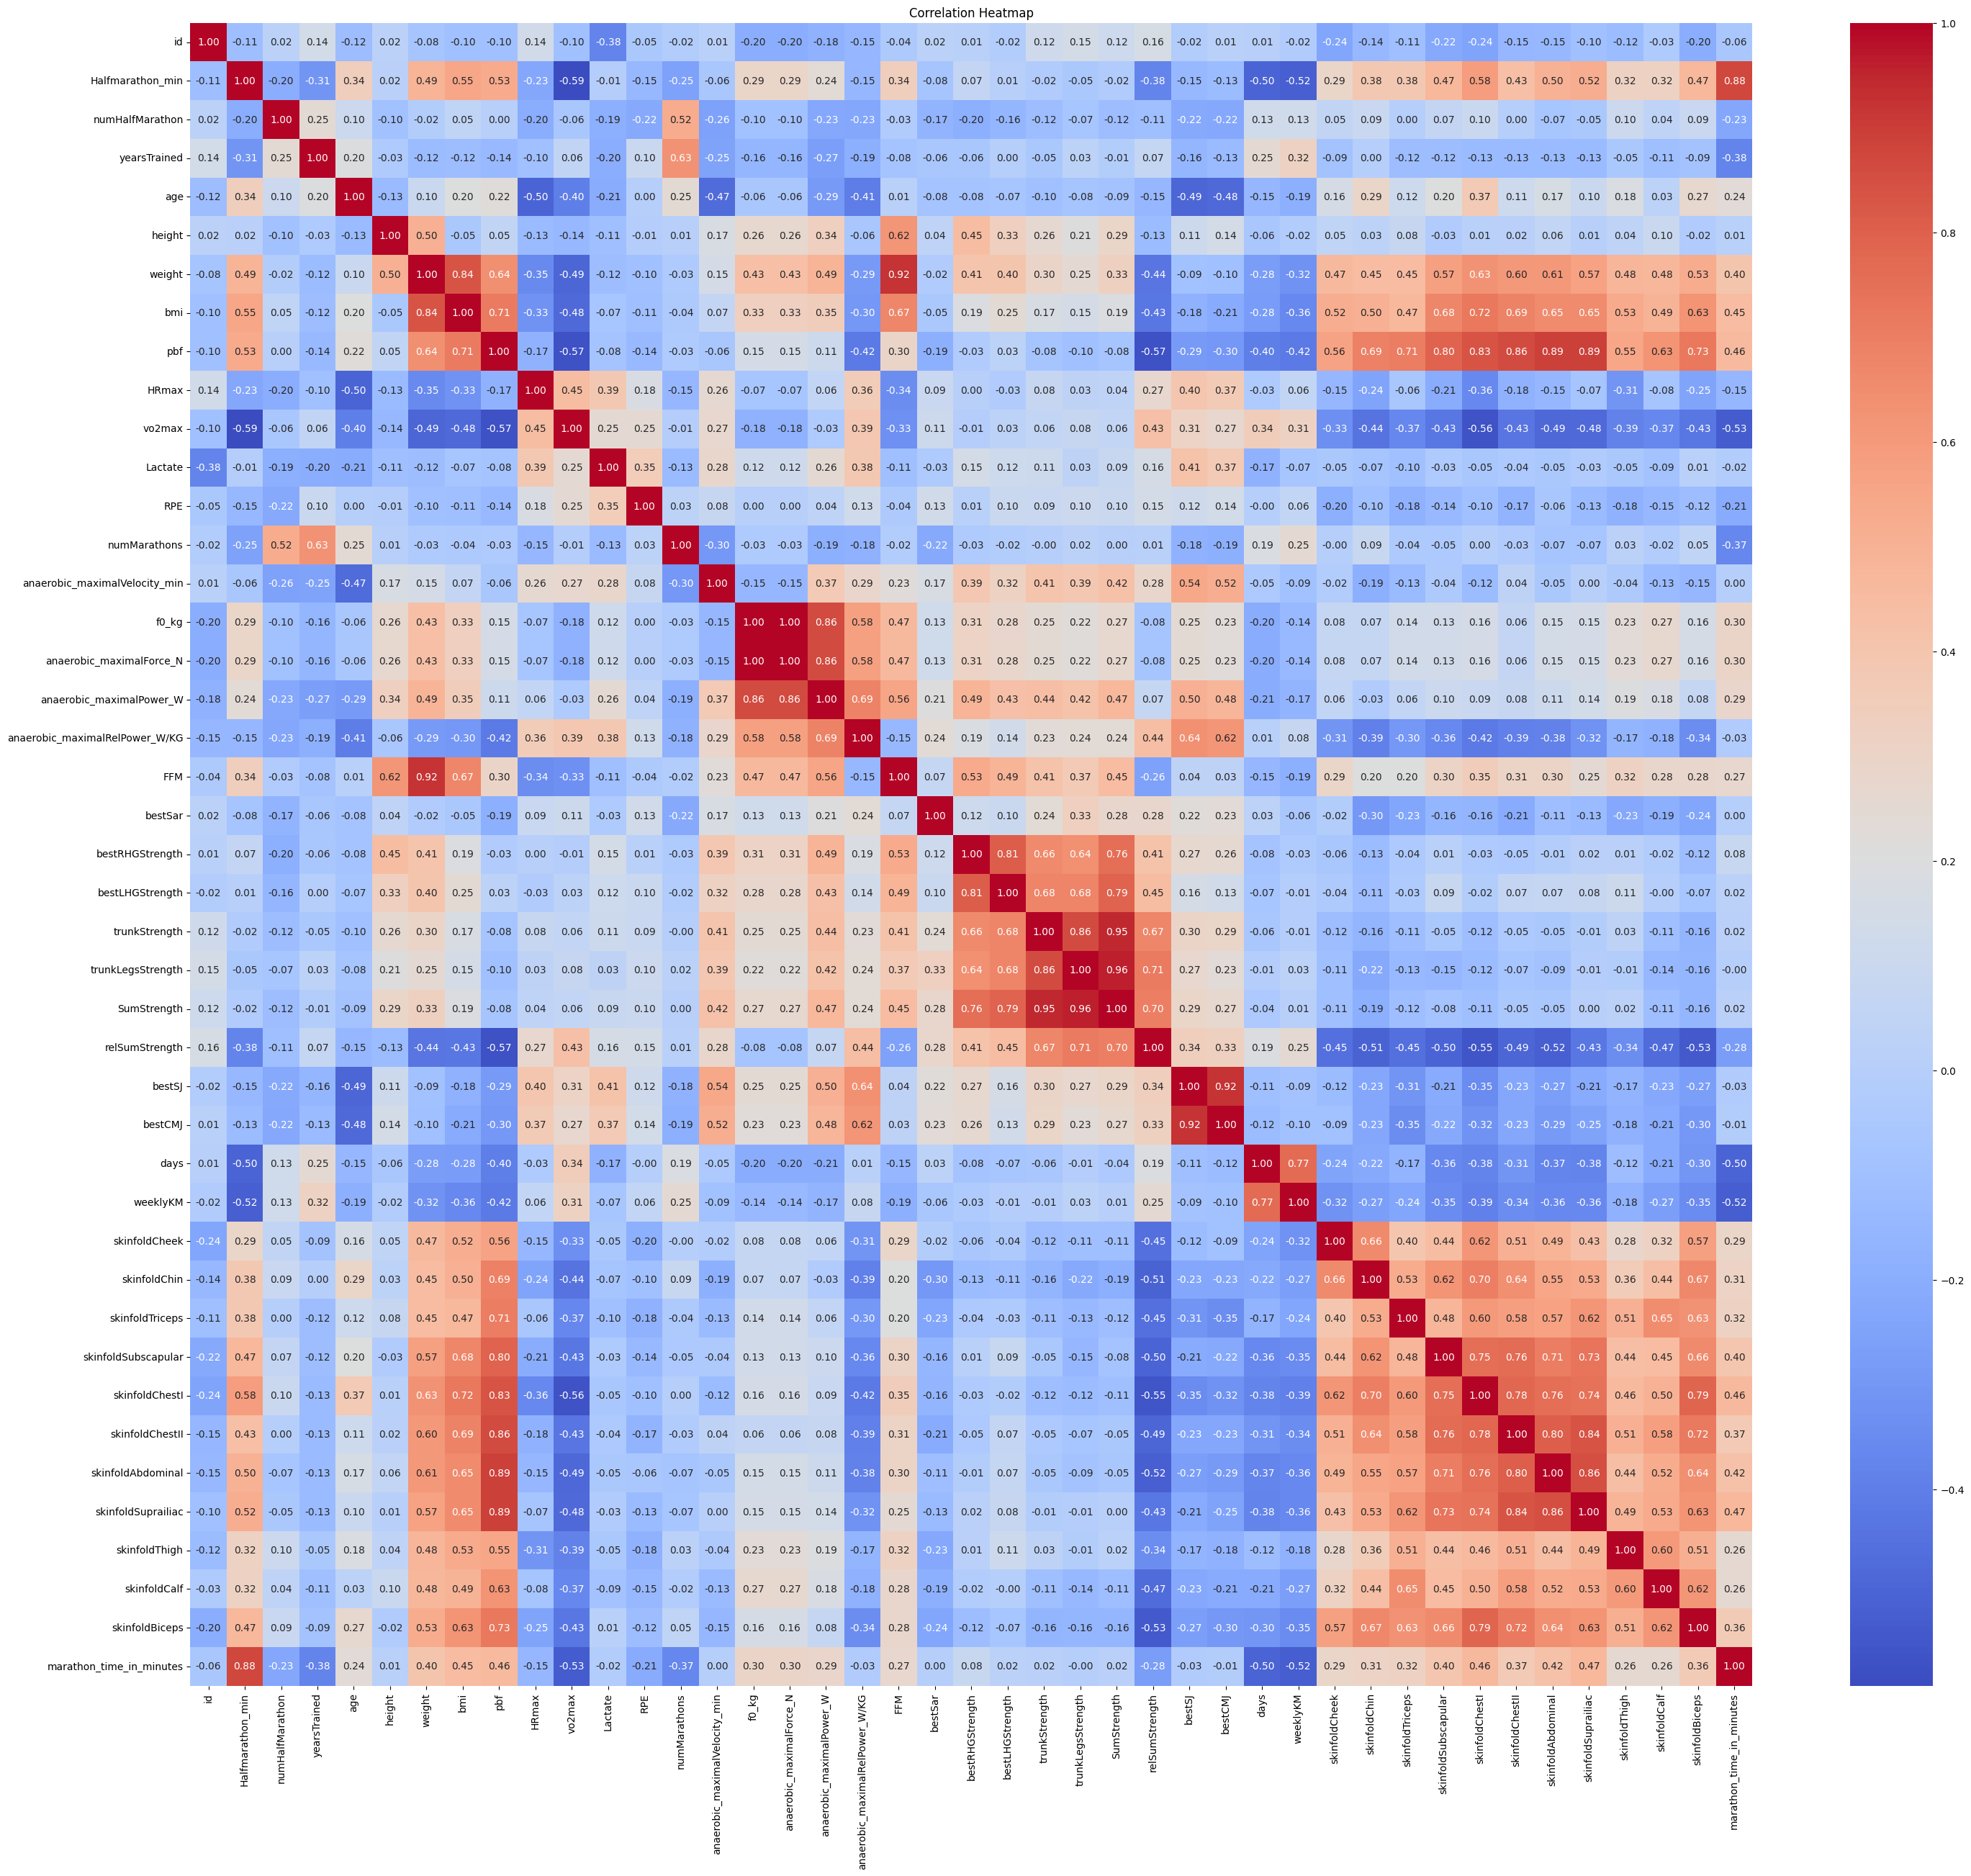

In [7]:
plt.figure(figsize=(35, 30))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

__Investigation__

Given our aim we can first start by looking at the strongest relations with half-marathon times and Marathon-Times. 

__*Remember*__: Normally we would look for positive correlations, but here we are trying to improve our half/full marathon time which means decrease the minutes it takes to run them race. Hence, we should be investigating the negative correlations.

- There seem to be a __positive correlation__ with Half-marathon minutes and all the skinfold (s[1-11]) measuramentes. Which lead us to think that the higher the skinfold measuraments the worse our half-Marathon performance will be. This also fully applies for the Marathon time where it is visible a very strong positive relationship between marathon time in minutes and all skinfold measuramentes. __Already from this first analysis we can evince that having a lower skinfold measurement in the overall body could lead to an improve in both half/full marathon times__

- As expected In both half/full Marathon times there is a strong __negative correlation__ wih weeklyKM and days of training which lead us into a first intuition that the more km per week and the more days of training lead to a better finishing time in both distances.

- As axpected there is a very strong __positive correlation__ between both half/full marathon times and weight,bmi(body mass index) and bf(percentage of body fat). The higher this values the worse the performance tends to be.

- Very important is the strong __negative correlation__ between both half/full marathon times and the VO2max. The higher the V02max the better the running performance. This is very much expected given that a runner rains to improve its VO2max to have a better oxygen uptake.

- Also yearsTrain(years of training) and numMarathons(number of finished marathons) seems to have a modest __negative correalation__ which would be good to investigate. 

## __*SCATTER PLOT ANALYSIS*__

From the HEATMAP above we can now look into the relationships between half-marathon time and marathon time with the chosen variables and also see if new evidence comes up:

- MARATHON chosen realizations:

    - *pbf*  -> positive influence __0.42__
    - *vo2max* -> negayive influence __-0.53__
    - *bmi* -> positive influence __0.45__
    - *weight* -> positive influence __0.40__
    - *Halfmarathon_min* positive influence __0.88__
    - *FFM* -> we were unsure and it has a low positive influence of 0.27 ( on the edge to be dropped)
    - *relSumStrength* -> low negative influence -0.28 (on the edge to be dropped)
    - *weeklykm* -> negative influence __-0.52__
    - *days* -> negative influence __-0.50__
    - *SKinfoldAbdominal* positive influence __0.42__
    - *SkinfoldSuprailic* positive influence __0.47__

- Given that we have already analyzed the scatters for the following, now lets search for possible preditors of each realization (threshold criterion +-0.30):

    - *pbf* -> anaerobicMaximalRelPower_w/KG, ~~weeklyKM~~, ~~days~~, ~~relSumSTrength~~, ~~Vo2max~~, ~~weight~~, ~~bmi~~, ~~skinfoldAbdominal~~, ~~skinfoldSUprailic~~, Halfmarathon_min
    - *vo2max* -> SkinfoldChest, FFM (on the edge), HRmax, Age, ~~weeklyKM~~ (on the edge), ~~days~~ (on the edge), ~~relSumSTrength~~, 
    - *bmi* -> ~~weeklyKM~~ (on the edge), ~~relSumSTrength~~, FFM,  ~~Vo2max~~, HRmax, ~~pbf~~ , Halfmarathon_min
    - *weight* -> ~~relSumSTrength~~, FFM, HRmax, height
    - *Halfmarathon_min* -> 
    - *FFM* -> hieght, HRmax
    - *relSumStrength* -> pbf, bmi, weight, Halfmarathon_min
    - *weeklykm* -> days, pbf, yearTrained, HalfMarathon_Time
    - *days* -> pbf
    - *SKinfoldAbdominal* -> days, weeklyKM, pbf,bmi,weight, Halfmarathon_min
    - *SkinfoldSuprailic* -> days, weeklyKM, pbf,bmi,weight, Halfmarathon_min

KEEP IN MIND:

CREATE A MODEL WHERE WEEKLYKM predict MARATHON TIME....

X = WEEKLY, DAYS

Y = MARATHON TIME

### __*SCATTER PLOTTING*__

__*auxilliary scatter plot function*__

In [ ]:
def make_scatter_plot(x,y,title,x_Label,y_Label,):
    plt.scatter(data[x], data[y])
    plt.title(title)
    plt.xlabel(x_Label)
    plt.ylabel(y_Label)
    plt.show()

__*loop over the mos interesting features*__

crete the scatter plots so that there is a direct comparison between the half and full marathon time one after the other 

No handles with labels found to put in legend.


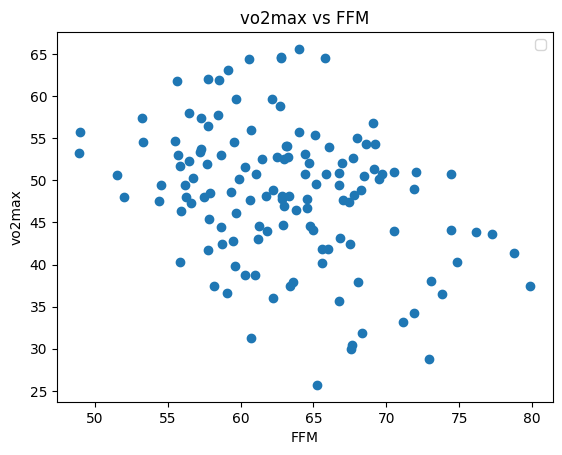

No handles with labels found to put in legend.


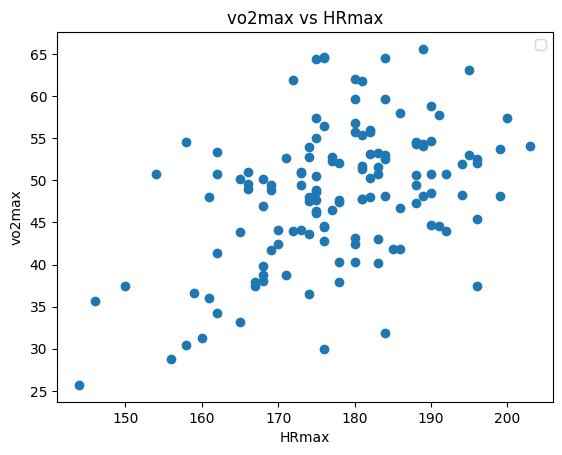

No handles with labels found to put in legend.


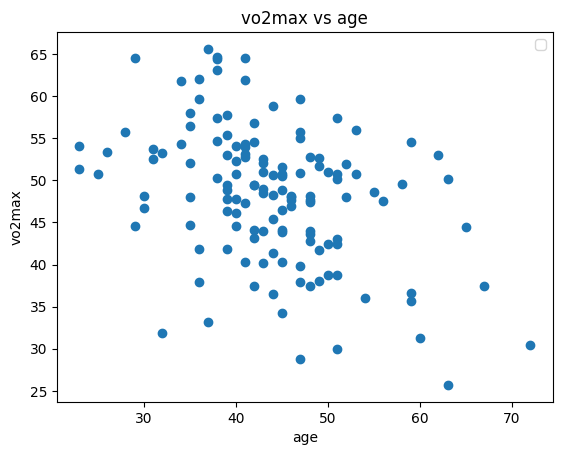

No handles with labels found to put in legend.


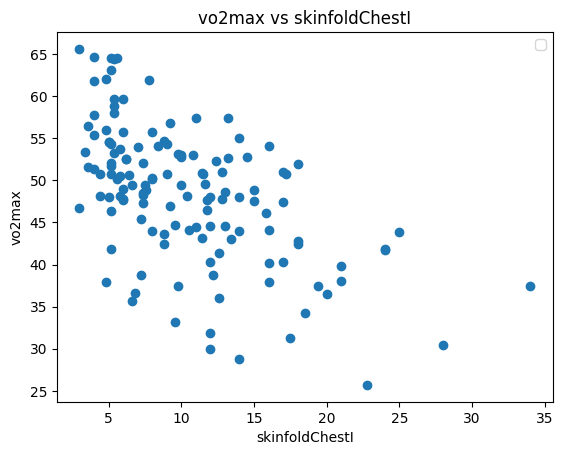

No handles with labels found to put in legend.


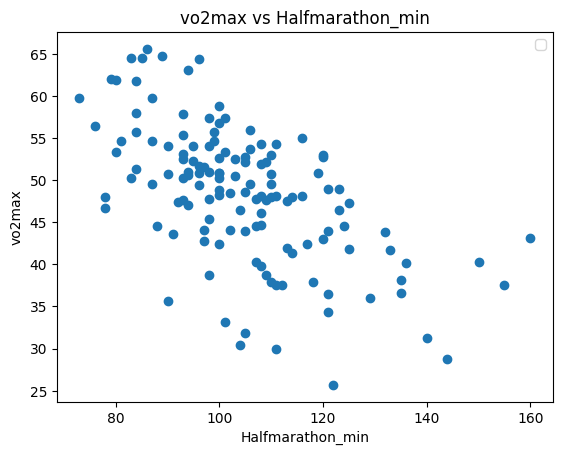

In [9]:
cols= ['FFM', 'HRmax', 'age' ,'skinfoldChestI', 'Halfmarathon_min']
x=['vo2max'] 

for col in cols:
    for x_axis in x:
        make_scatter_plot(col,x_axis,f'{x_axis} vs {col}',col,x_axis)

SKinfoldChest is to drop

HRmax and vo2max relationship seems to be holding a bit 

also age we can kinda say relation tends to be there

FFM is to try out

No handles with labels found to put in legend.


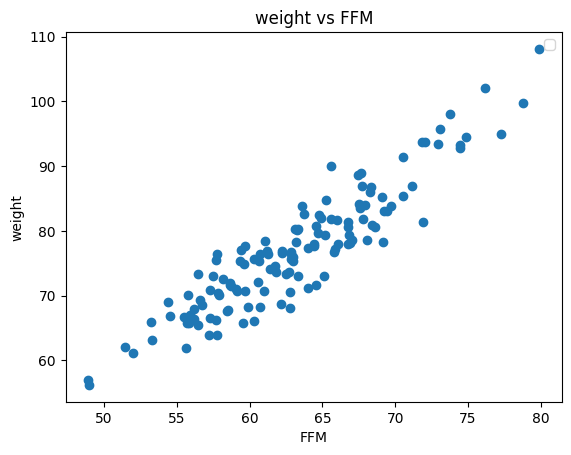

No handles with labels found to put in legend.


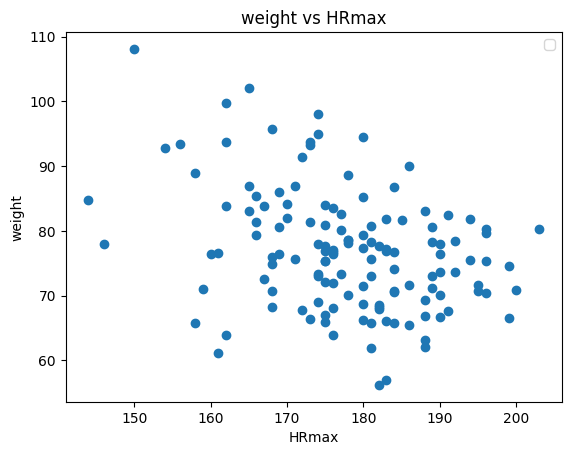

No handles with labels found to put in legend.


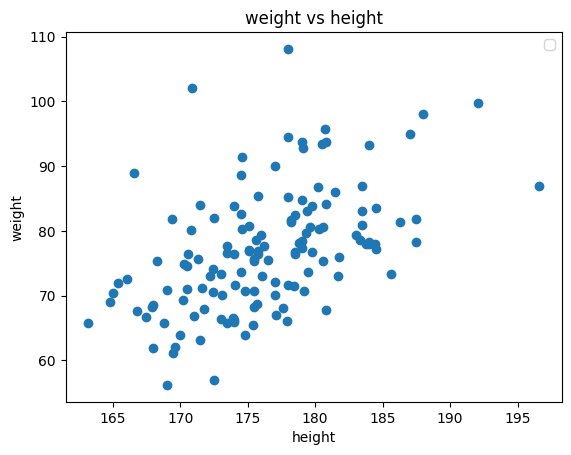

No handles with labels found to put in legend.


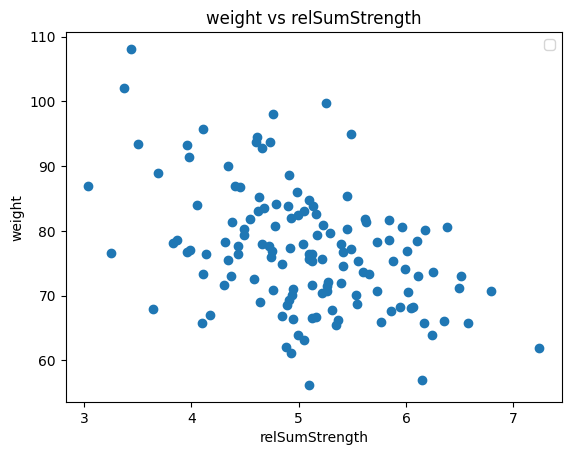

No handles with labels found to put in legend.


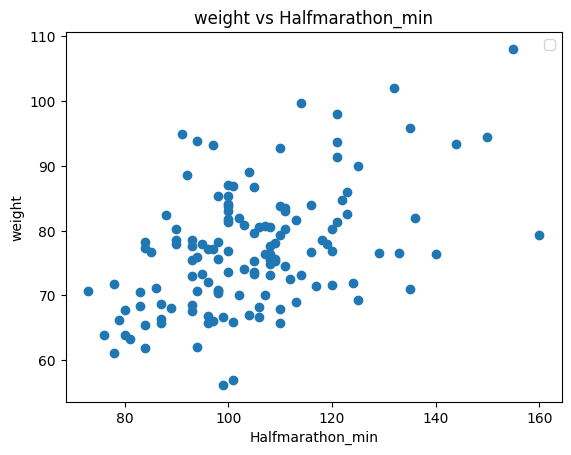

In [10]:
cols= ['FFM', 'HRmax', 'height' ,'relSumStrength', 'Halfmarathon_min']
x=['weight'] 

for col in cols:
    for x_axis in x:
        make_scatter_plot(col,x_axis,f'{x_axis} vs {col}',col,x_axis)

crazy exemplified relation for FFM and weight which is expected

seems to be none the relation with HRmax

height and weight as expected, relation is there

Not really a pattern when dealing with relSumStrength 

No handles with labels found to put in legend.


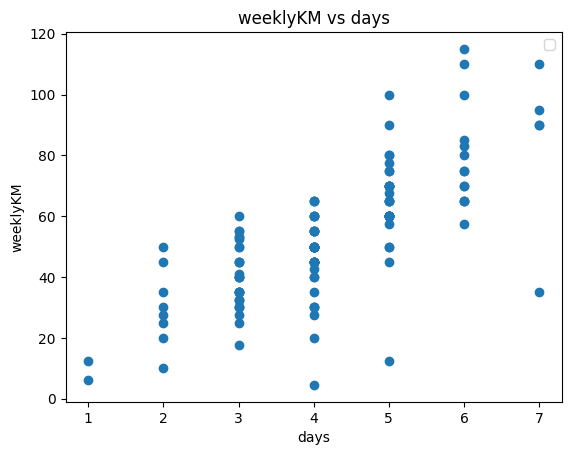

No handles with labels found to put in legend.


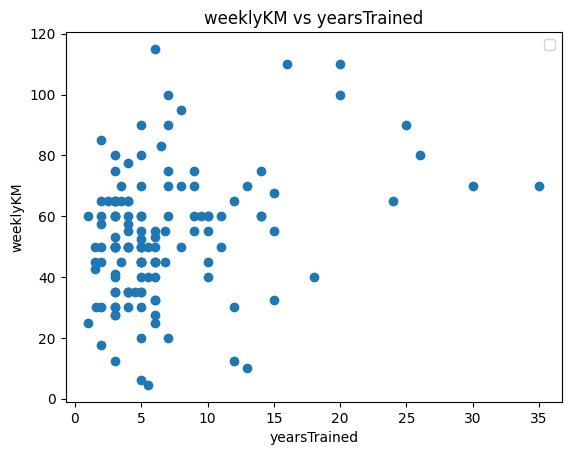

No handles with labels found to put in legend.


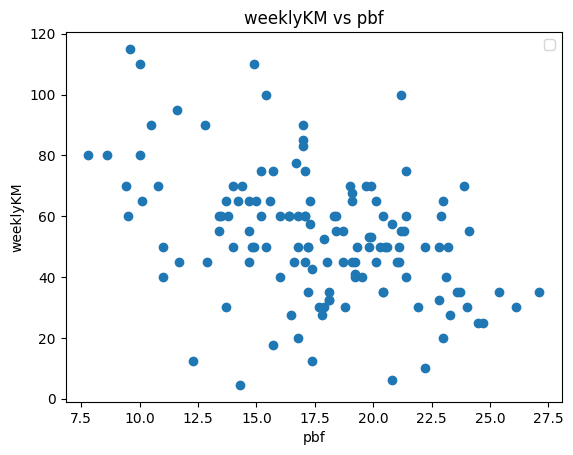

No handles with labels found to put in legend.


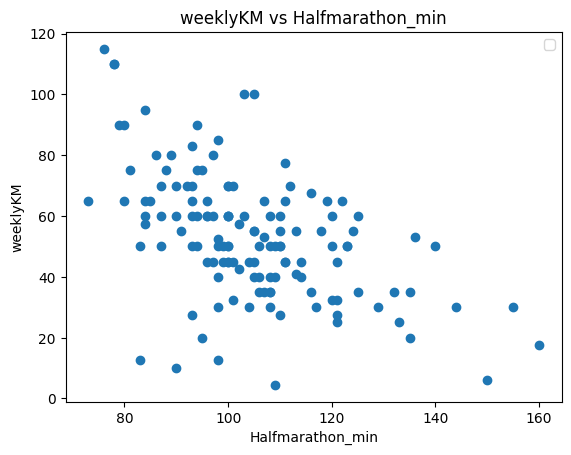

In [13]:
cols= ['days', 'yearsTrained', 'pbf' ,'Halfmarathon_min']
x=['weeklyKM'] 

for col in cols:
    for x_axis in x:
        make_scatter_plot(col,x_axis,f'{x_axis} vs {col}',col,x_axis)

pbf is definetly to drop

yearsTrained has no pattern

days is the only one with a pattern!!

No handles with labels found to put in legend.


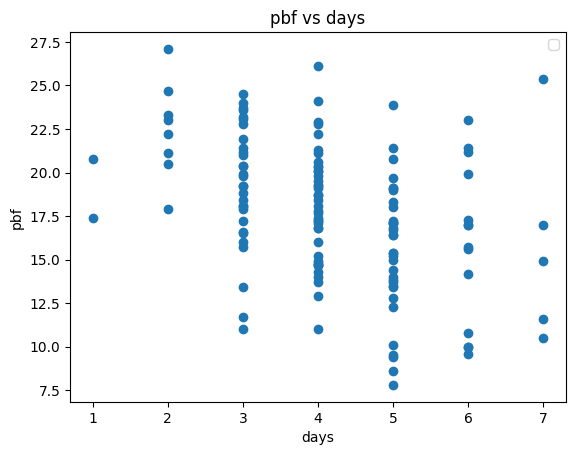

No handles with labels found to put in legend.


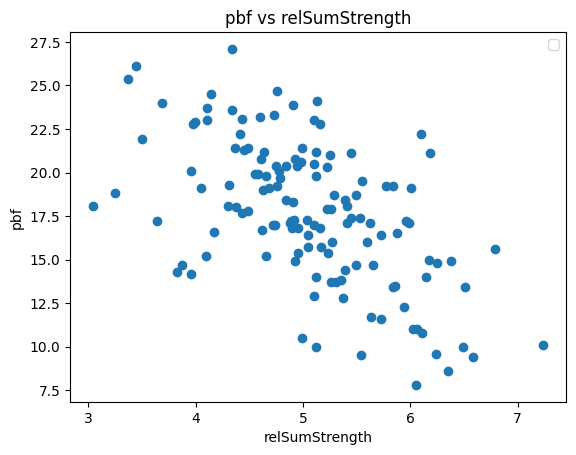

No handles with labels found to put in legend.


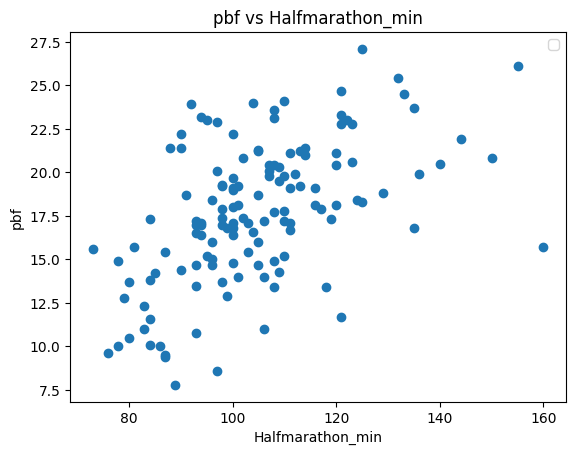

In [14]:
cols= ['days', 'relSumStrength' ,'Halfmarathon_min']
x=['pbf'] 

for col in cols:
    for x_axis in x:
        make_scatter_plot(col,x_axis,f'{x_axis} vs {col}',col,x_axis)

pbf and days kinda pattern

halfmarathon_min and relSUmSTrength is there !!

In [ ]:
cols= ['days', 'relSumStrength' ,'Halfmarathon_min']
x=['bmi'] 

### __*CONSIDERATIONS - Scatter plot analysis*__

As shown from the scatter plots our previous assumptions are confirmed. The correlations that the heatmap was showing are also shown by the scatter plots, though, scatter plots are also very uselful to show us more concise patterns and outliers. It is possible to see that the are some outliers in some correalations,though, they shouldn't be impactingthe analysis too much.

*Conclusion*

- Most athlete can run a sub 2hr half marahon even with a low weekly mileage but less can run a sub 4hr marathon with low weekly mileage. Athlete that ran a sub 1.30hr half marathon ran 50+km per week and the same thing seems to be valid also for people that ran a sub 3.30 hr. Both cases when dealing with 100+ km per week, the more the weekly mileage increases the better the performance. 

- Most people Athletesare able toruna sub 2hr halfmarathon even by training only 3 days a week, though most of the athletesthat run 3 days a week are not able to run a sub 4hr marathon. Most athletes that are able to run a sub 1.30hr half marathon train beween 5-7 days a week and the same applies to runners that ran a sub 3.30hr marahon.

- vo2max pattern indicates thata higher vo2max means a faster race, though, many athletestend to have a vo2max in between range[45-55] and are able to run a sub 2hr half marathon but some struggle to run a sub 4hr marathon. a vo2max higherthan 55 seems to indicate the ability of running a sub 1.30hr half marathon and a sub 3hr marathon.

- The number of marathons ran doesn't really seem to help when it is below 5. It seems distributed equally between all finishing times. It is possible to understand though that it it never happened (apart from some outliers) that an athlete has ran more than 6 or 7 half/full marathons and ran and din't manage to run a sub 2hr or sub 4hr.

- It is immediately possible to see tha with more than 15 years of training finishing time improves a lot. Though, also many people thattrained just for 4-10 years are able to reach very good times close to sub 1.30hr in half marathon or sub 3.20hr in marathon.

- Weight, bmi and bf all have the expected pattern, as they decrease half/full marathon finishing time improves. Still most athletes that weight even 80-90kg seem to be able to run a sub 2hr half marathon and even if some struggle also some seem to be able to run a sub 4hr marathon.

## __*INVESTIGATE POSSIBLE INTERACTIONS*__

### __*weeklyKM VS days*__

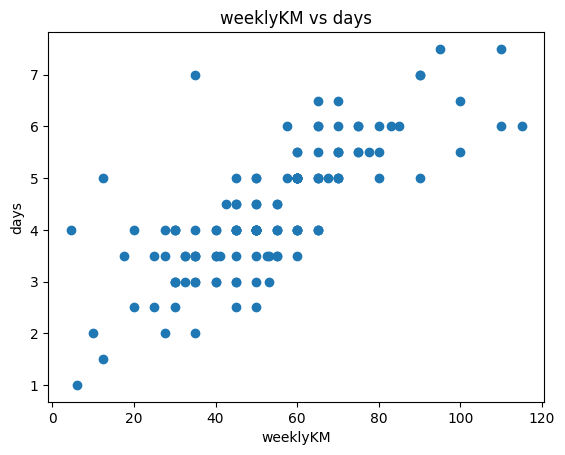

In [10]:
plt.scatter(data['weeklyKM'], data['days'])
plt.title('weeklyKM vs days')
plt.xlabel('weeklyKM')
plt.ylabel('days')
plt.show()

Relationship looks linear which means an interaction term might be very useful. As weeklyKM increases also days of training need to increase, it is also a bit intuitive.


### __*vo2max vs HRmax*__

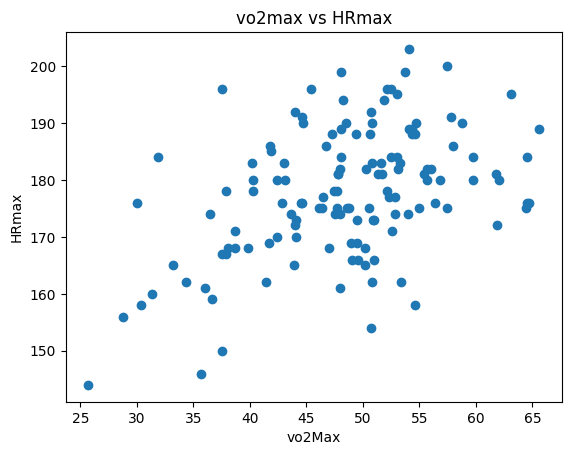

In [34]:
plt.scatter(data['vo2max'], data['HRmax'])
plt.title('vo2max vs HRmax')
plt.xlabel('vo2Max')
plt.ylabel('HRmax')
plt.show()

Relationship looks kinda linear bu not that much, still given a higher heart rate it seems that a higher vo2max is there. We have to take into account that as age increases, the heart rate upper bound  decreases.

### __*HRmax vs age*__

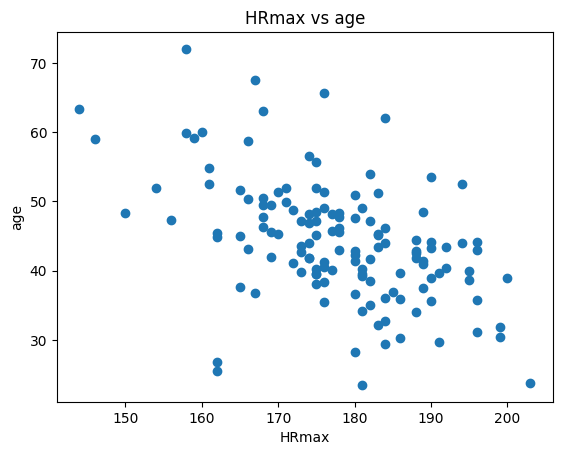

In [12]:
plt.scatter(data['HRmax'], data['age'])
plt.title('HRmax vs age')
plt.xlabel('HRmax')
plt.ylabel('age')
plt.show()

This pattern exemplifies what I was saying where as age increases the maximal heart rate decreases, we have an inverse correltion

### __*vo2mx vs anaerobic maximalVelocity min*__

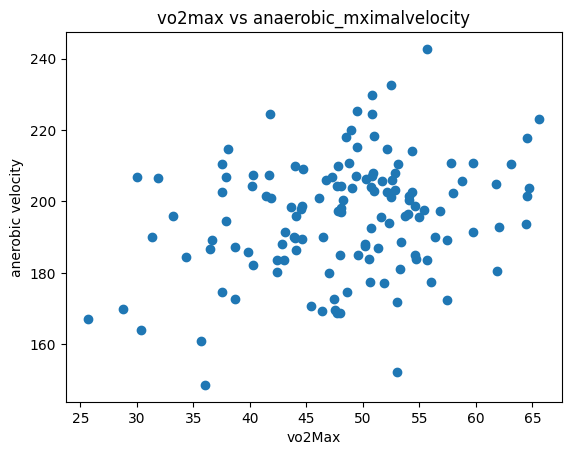

In [16]:
plt.scatter(data['vo2max'], data['anaerobic_maximalVelocity_min'])
plt.title('vo2max vs anaerobic_mximalvelocity')
plt.xlabel('vo2Max')
plt.ylabel('anerobic velocity')
plt.show()

__CONSIDERATIONS__

Not a big relation

### __*vo2max vs age*__

FROM https://www.healthline.com/health/vo2-max#averages it is possible to read that there is a relationship between vo2max and age

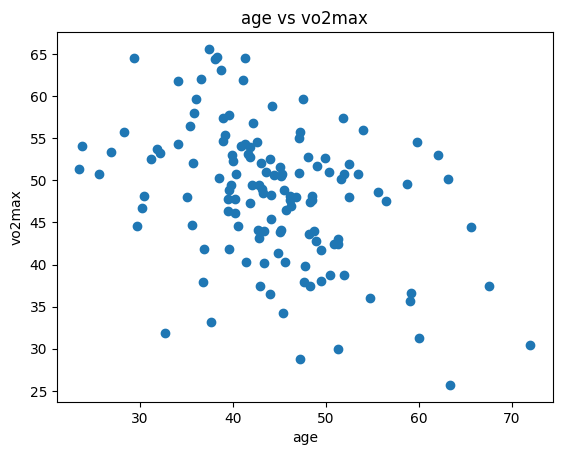

In [31]:
plt.scatter(data['age'], data['vo2max'])
plt.title('age vs vo2max')
plt.xlabel('age')
plt.ylabel('vo2max')
plt.show()

__CONSIDERATIONS__

It is possible to see the linear pattern, as age increses, vo2max decreases. Thisis exactly what was said in the article above. This would be a good invstigation to go though with an interaction term


### __*FITTING LINEAR REGRESSIONS TO FURTHER ANALYSE INTERACTIONS*__

__*Try to fit a linear regression to see if our suspected interactions are proved*__

#### __*triple interaction term : vo2max * HRmax * age*__

In [13]:
import statsmodels.formula.api as smf

model = smf.ols("marathon_time_in_minutes ~ vo2max * HRmax * age", data=data).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     marathon_time_in_minutes   R-squared:                       0.341
Model:                                  OLS   Adj. R-squared:                  0.303
Method:                       Least Squares   F-statistic:                     9.153
Date:                      Wed, 12 Mar 2025   Prob (F-statistic):           4.34e-09
Time:                              08:35:03   Log-Likelihood:                -661.60
No. Observations:                       132   AIC:                             1339.
Df Residuals:                           124   BIC:                             1362.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

__*CONSIDERATIONS*__

It seems like the p-values tells us that age is notvery much significant or correlaed withthe other two. Though, HRmax and vo2max seems be a bit significant and seem to be prone to be interactingwith themselves.

#### __*double interaction term : vo2max * age*__

In [33]:
model = smf.ols(" marathon_time_in_minutes ~ vo2max * age", data=data).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     marathon_time_in_minutes   R-squared:                       0.305
Model:                                  OLS   Adj. R-squared:                  0.288
Method:                       Least Squares   F-statistic:                     18.69
Date:                      Wed, 12 Mar 2025   Prob (F-statistic):           4.07e-10
Time:                              14:37:30   Log-Likelihood:                -665.11
No. Observations:                       132   AIC:                             1338.
Df Residuals:                           128   BIC:                             1350.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

#### __*double interaction term : weeklyKM * days*__

In [35]:
model = smf.ols(" marathon_time_in_minutes ~ weeklyKM * days", data=data).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     marathon_time_in_minutes   R-squared:                       0.298
Model:                                  OLS   Adj. R-squared:                  0.282
Method:                       Least Squares   F-statistic:                     18.14
Date:                      Wed, 12 Mar 2025   Prob (F-statistic):           7.16e-10
Time:                              14:40:19   Log-Likelihood:                -665.71
No. Observations:                       132   AIC:                             1339.
Df Residuals:                           128   BIC:                             1351.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

#### __*create the interaction term*__

In [15]:
data['HR_vo2max_interaction'] = data['HRmax'] * data['vo2max']

## __*PAIRPLOT*__

__*PLOTTING THE PROBABILITY DENSIY FUNCTION*__

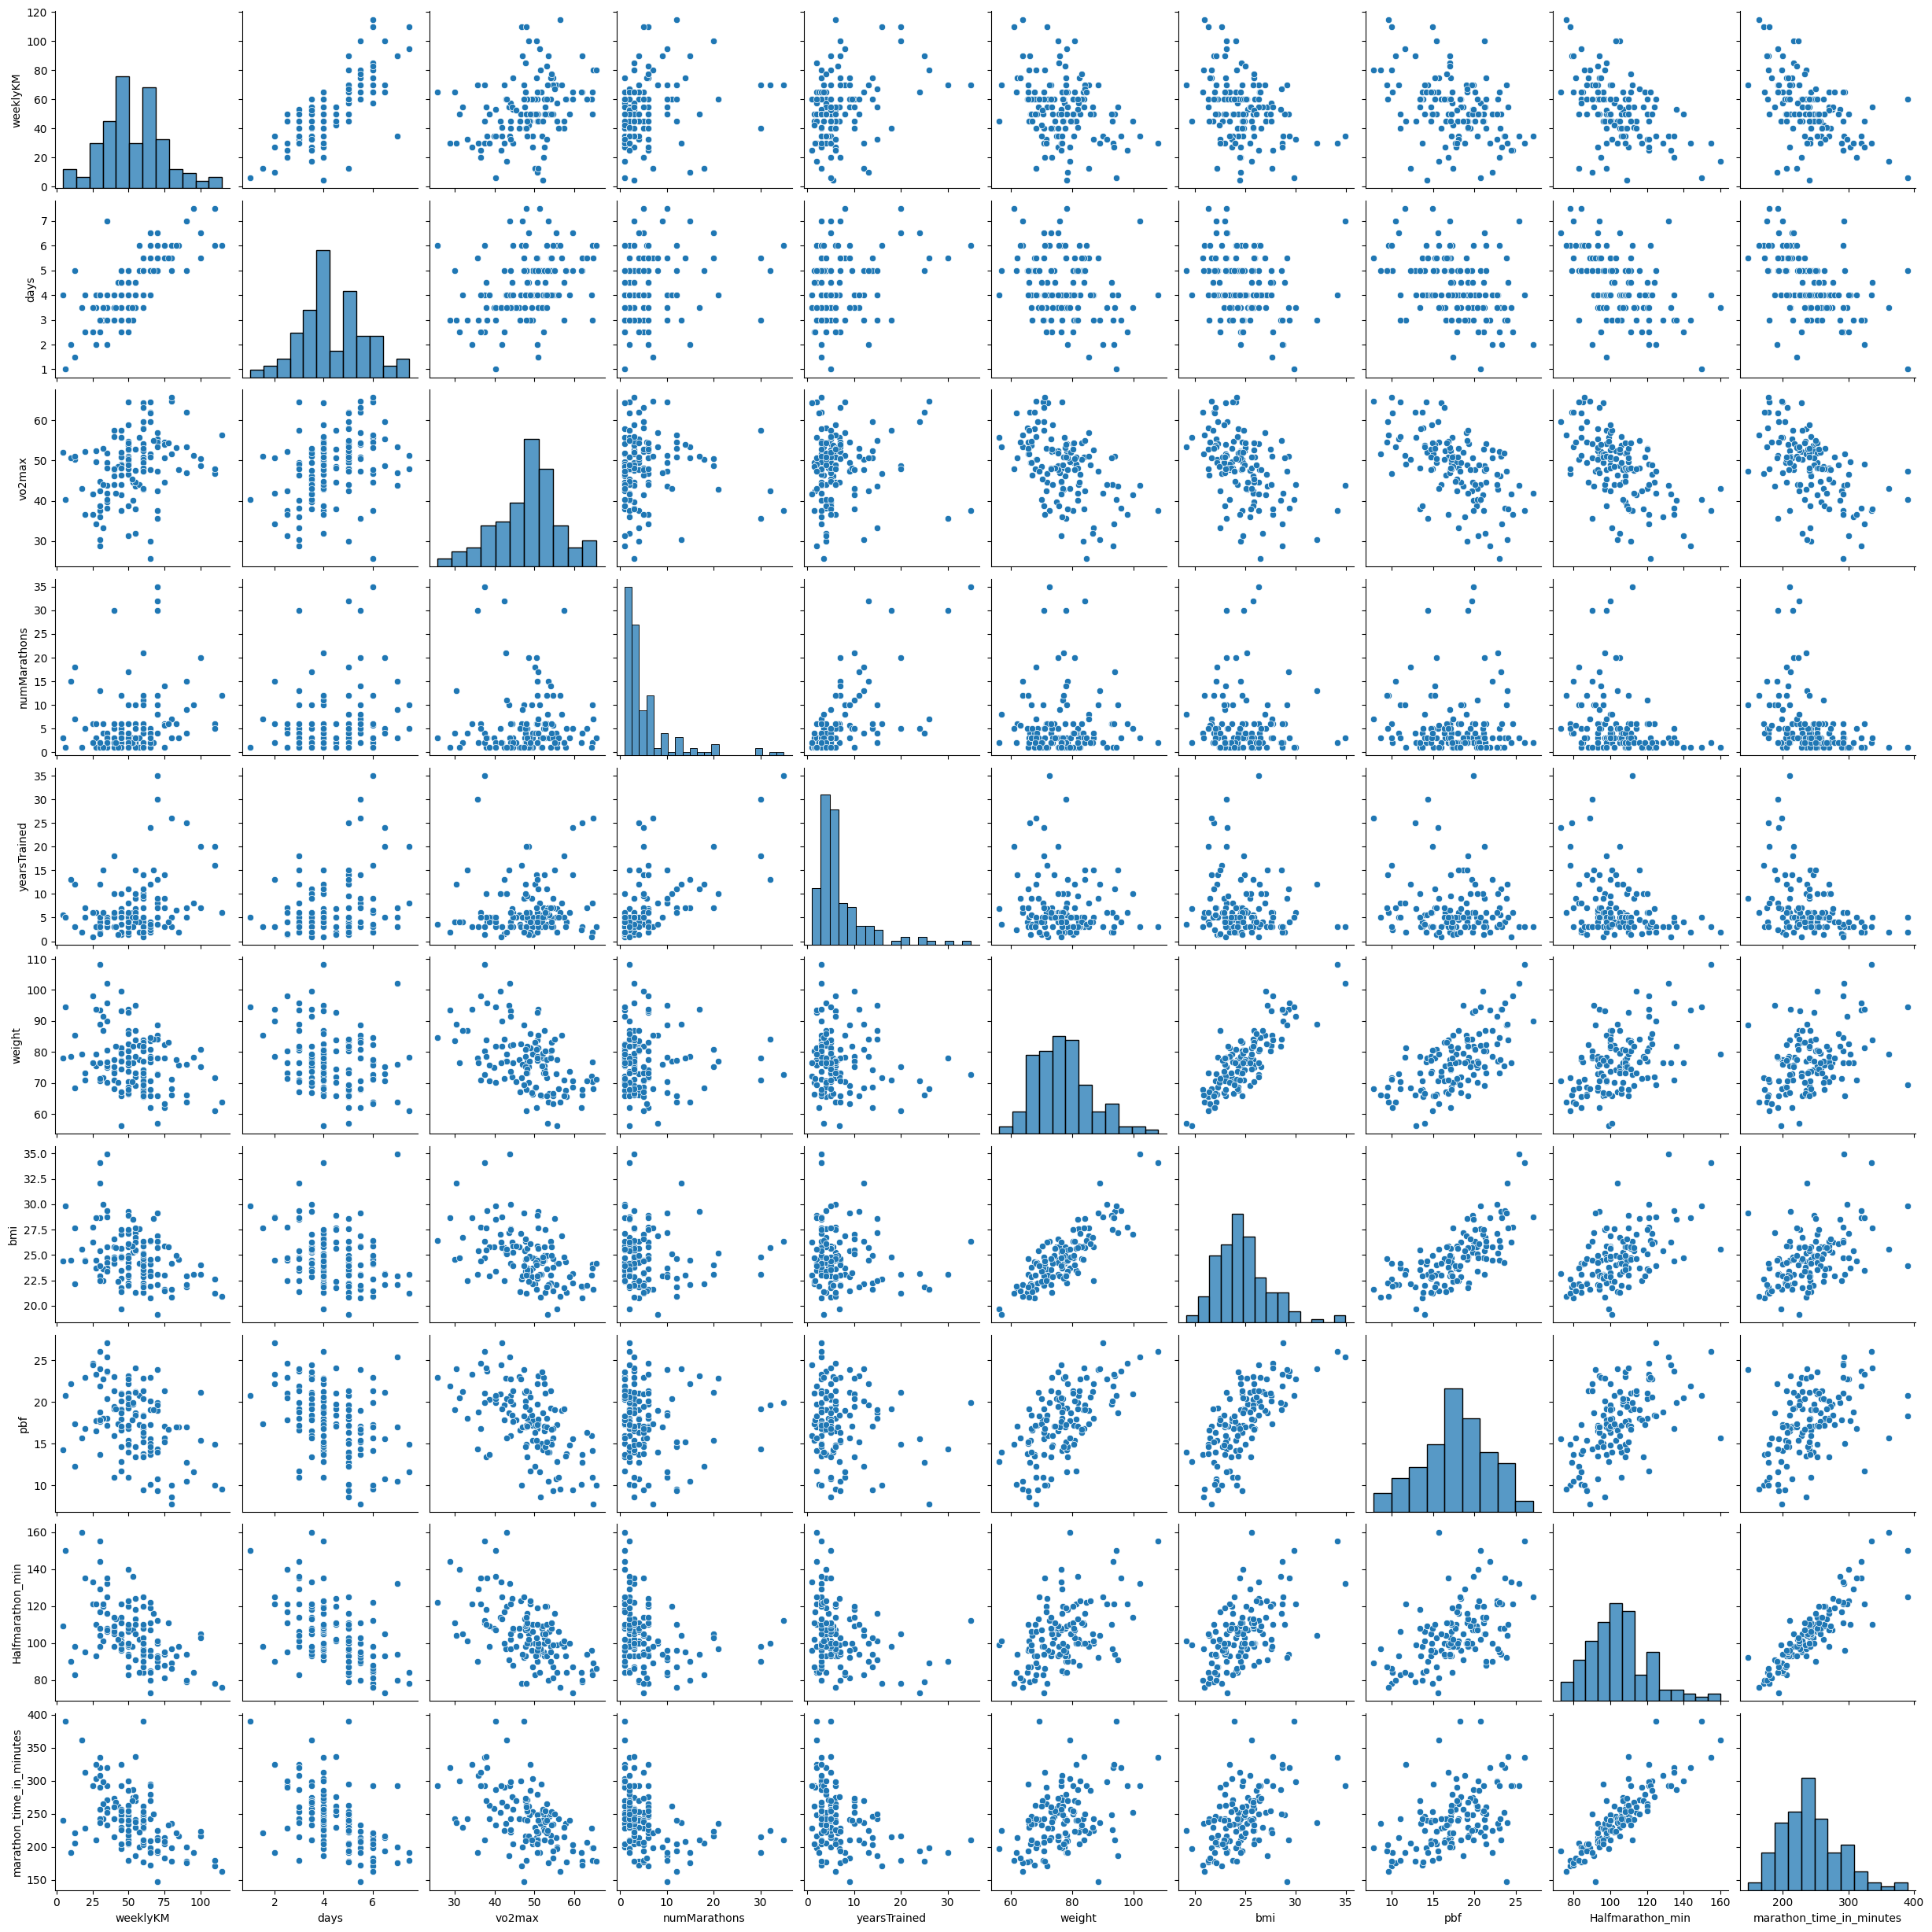

In [16]:
sns.pairplot(data[['weeklyKM', 'days', 'vo2max' ,'numMarathons', 'yearsTrained', 'weight', 'bmi', 'pbf','Halfmarathon_min', 'marathon_time_in_minutes']])
plt.show()

## __*KDEPLOT*__

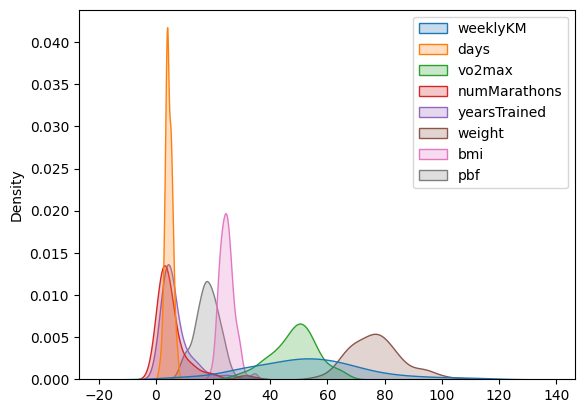

In [17]:
# for col in data.columns:
#     sns.kdeplot(data[col], fill=True, color='blue')
#     plt.show()

sns.kdeplot(data[['weeklyKM', 'days', 'vo2max' ,'numMarathons', 'yearsTrained', 'weight', 'bmi', 'pbf']], fill=True, color='blue')
plt.show()


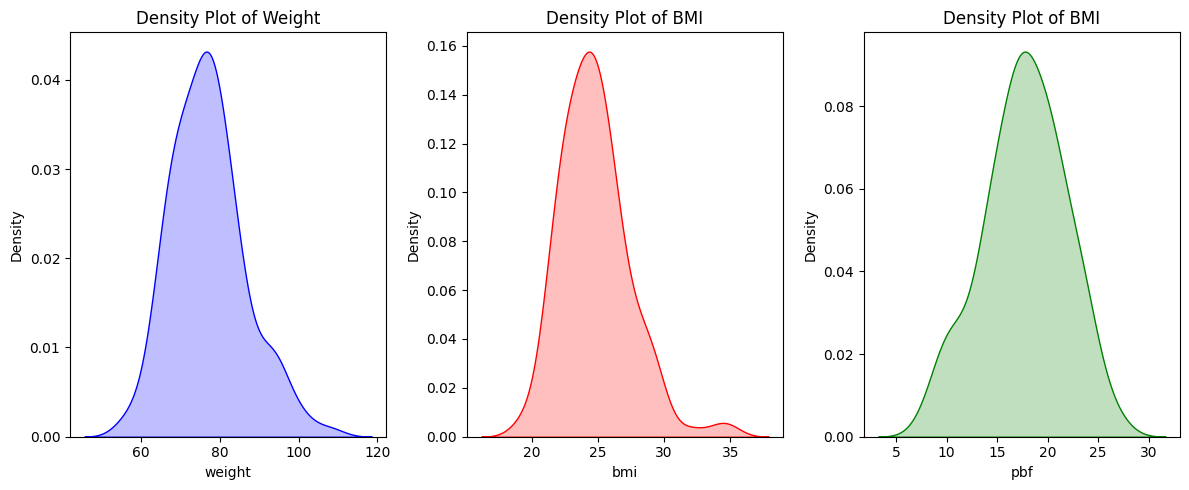

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.kdeplot(data['weight'], fill=True, color='blue', ax=axes[0])
axes[0].set_title('Density Plot of Weight')

sns.kdeplot(data['bmi'], fill=True, color='red', ax=axes[1])
axes[1].set_title('Density Plot of BMI')

sns.kdeplot(data['pbf'], fill=True, color='green', ax=axes[2])
axes[2].set_title('Density Plot of BMI')

plt.tight_layout()  
plt.show()


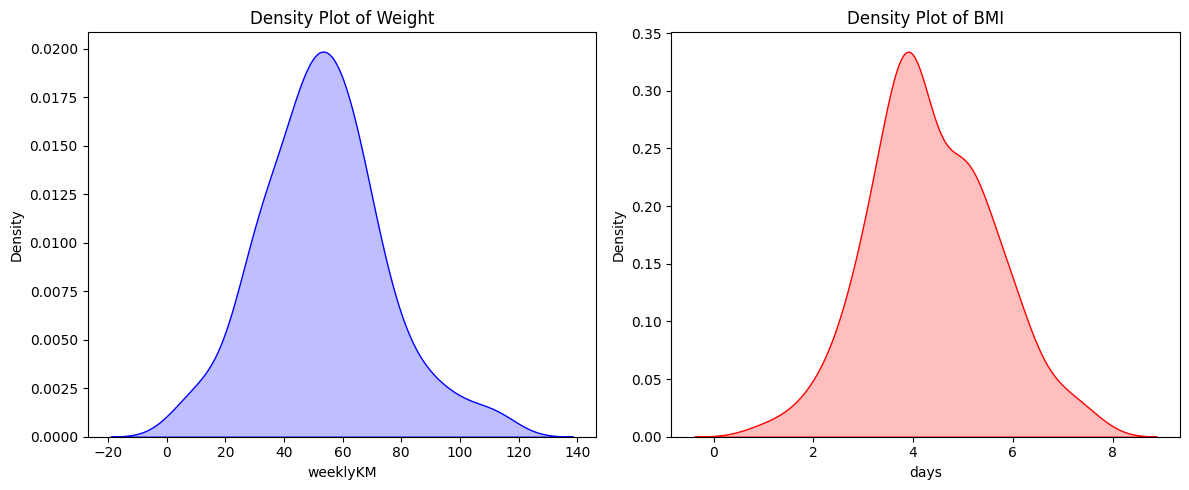

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(data['weeklyKM'], fill=True, color='blue', ax=axes[0])
axes[0].set_title('Density Plot of Weight')

sns.kdeplot(data['days'], fill=True, color='red', ax=axes[1])
axes[1].set_title('Density Plot of BMI')


plt.tight_layout()  
plt.show()
